# AI Lab Assignment H5: Convolutional Neural Networks

In this lab, you will implement and compare two different convolutional neural network (CNN) architectures. You will first design your own CNN, and then implement a
known architecture (AlexNet) using TensorFlow.

### Scenario

You are now a machine learning engineer at DaciaVision Analytics. Your new task is to develop an image classification system for object recognition. You will use the
**CIFAR-10** and **MNIST datasets** as your base and design two CNNs: one original model designed by you, and a recreation of the historical AlexNet.

Your goal:
- Achieve as high accuracy as possible.
- Compare the performance between your custom CNN and AlexNet.
- Identify weakly performing classes and improve the model through data augmentation

If training on the full CIFAR-10 dataset is too slow, you may sample a fixed percentage from each class (e.g., 20-30%).


## Instructions

Implement a **convolutional neural network-based image classification system** using TensorFlow Keras.

## Requirements

### 1. Data Preprocessing

- Load the **CIFAR-10** and **MNIST** datasets ( tf.keras.datasets.mnist , tf.keras.datasets.cifar10 ).
- Normalize pixel values to [0, 1] .
- Optionally reduce dataset size by sampling **X% per class** if needed.
- Split into training and testing datasets.


Let us import some important libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

import seaborn as sns
import time

## Loading the datasets

Now let us load the datasets and see **how the test data looks** ( the train data looks the same, but we have more rows).

In [2]:
# Load MNIST
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = mnist.load_data()

# Load CIFAR-10
(X_cifar_train, y_cifar_train), (X_cifar_test, y_cifar_test) = cifar10.load_data()


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 116s 1us/step


In [3]:
print(X_mnist_test)
print(X_mnist_test.shape)
print(y_mnist_test)
print(y_mnist_test.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
(10000,)


We can see that each datapoint is a 28x28 image of a digit, having in total 764 pixels and the target y is just a column with values of the target class (0,1,2,3,4,5,6,7,8 or 9).

In [4]:
print(X_cifar_test)
print(X_cifar_test.shape)
print(y_cifar_test)
print(y_cifar_test.shape)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

We can see that each datapoint is a 32x32 image of a digit, having in total 1024 pixels (the only difference from the MNIST is that we have now 3 values for each pixel - each corresponding to a RGB channel), and the target y is just a column with values of the target class (0,1,2,3,4,5,6,7,8 or 9).

## Reducing the size of the datasets

Let us reduce the size of MNIST & CIFAR-10 **train data**, because it will be more computationally efficient to train the model.

This is a function that **reduces the X and y sizes to percentage x%**.

In [5]:
def sample_per_class(X, y, percentage=0.3, num_classes=10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X_sampled = []
    y_sampled = []
    
    y_flat = y.flatten()
    
    for class_label in range(num_classes):
        indices = np.where(y_flat == class_label)[0] 
        np.random.shuffle(indices)
        
        num_to_select = int(len(indices) * percentage)
        selected = indices[:num_to_select]
        
        X_sampled.append(X[selected])
        y_sampled.append(y[selected])
    
    # Concatenate and shuffle
    X_out = np.concatenate(X_sampled, axis=0)
    y_out = np.concatenate(y_sampled, axis=0)
    
    shuffled_indices = np.random.permutation(len(X_out))
    return X_out[shuffled_indices], y_out[shuffled_indices]


This is the size of the training MNIST data BEFORE the reduction:

In [6]:
print(f'{X_mnist_train.shape} - size of X train of MNIST') 
print(f'{y_mnist_train.shape} - size of y train of MNIST') 

(60000, 28, 28) - size of X train of MNIST
(60000,) - size of y train of MNIST


And this is the size of the training CIFAR-10 data BEFORE the reduction:

In [7]:
print(f'{X_cifar_train.shape} - size of X train of CIFAR-10') 
print(f'{y_cifar_train.shape} - size of y train of CIFAR-10') 

(50000, 32, 32, 3) - size of X train of CIFAR-10
(50000, 1) - size of y train of CIFAR-10


Let us reduce to **35% the size of the dataset**, because this keeps enough information, taking into consideration that we this for every class separately, so we do not discrimate between classes.

In [8]:
X_mnist_train_reduced, y_mnist_train_reduced = sample_per_class(X_mnist_train, y_mnist_train, percentage=0.35, seed=42)
X_cifar_train_reduced, y_cifar_train_reduced = sample_per_class(X_cifar_train, y_cifar_train, percentage=0.35, seed=42)

And now let us see the final sizes, after reduction.

In [9]:
print(f'{X_mnist_train_reduced.shape} - size of X train of MNIST AFTER REDUCTION')
print(f'{y_mnist_train_reduced.shape} - size of y train of MNIST AFTER REDUCTION')

(20995, 28, 28) - size of X train of MNIST AFTER REDUCTION
(20995,) - size of y train of MNIST AFTER REDUCTION


In [10]:
print(f'{X_cifar_train_reduced.shape} - size of X train of CIFAR-10 AFTER REDUCTION')
print(f'{y_cifar_train_reduced.shape} - size of y train of CIFAR-10 AFTER REDUCTION')

(17500, 32, 32, 3) - size of X train of CIFAR-10 AFTER REDUCTION
(17500, 1) - size of y train of CIFAR-10 AFTER REDUCTION


This reduction also keeps a fair balance between test and train data - we have approximately 
- **1/3** of each dataset = TEST DATA
- **2/3** of each dataset = TRAIN DATA

## Making MNIST 32x32

This helps us keep the same architecture and structure for our models, us being able to compare better between datasets.

Let us first add the 1 channel, because we have black & white images.

In [11]:
X_mnist_train_reduced = X_mnist_train_reduced.reshape(-1, 28, 28, 1)  # Ensure there's 1 channel
X_mnist_test = X_mnist_test.reshape(-1, 28, 28, 1)

And now we can actually resize the images using tf.image.

In [12]:
X_mnist_train_resized = tf.image.resize(X_mnist_train_reduced, [32, 32])
X_mnist_test_resized = tf.image.resize(X_mnist_test, [32, 32])

Transform back to numpy arrays, to not have any problems with the data types afterwards.

In [13]:
X_mnist_train_resized = X_mnist_train_resized.numpy()
X_mnist_test_resized = X_mnist_test_resized.numpy()

In [14]:
print(f'{X_mnist_train_resized.shape} - size of X train of MNIST AFTER RESHAPING 28->32') 
print(f'{X_mnist_test_resized.shape} - size of X tes of MNIST AFTER RESHAPING 28->32') 

(20995, 32, 32, 1) - size of X train of MNIST AFTER RESHAPING 28->32
(10000, 32, 32, 1) - size of X tes of MNIST AFTER RESHAPING 28->32


## Normalizing pixels

This step is important because:
- we have features which are in a wide range (each pixels ranges from 0 to 255)
- we have to make them matter the same to the ML model
- prevent numerical instability
- normal distribution assumption

In [15]:
X_mnist_train_final = X_mnist_train_resized.astype("float32") / 255.
X_mnist_test_final = X_mnist_test_resized.astype("float32") / 255.

X_cifar_train_final = X_cifar_train_reduced.astype("float32") / 255.
X_cifar_test_final = X_cifar_test.astype("float32") / 255.

### 2. Model Implementation

### A. Custom CNN Model

CNNs
- specialized NNs designed for grid-like data
- automatically learn spacial hierarchies of features through convolution operations
- highly effective in tasks involving visual perception



Design your own CNN architecture:
  - Minimum 2 convolutional layers.
  - Pooling layers.
  - Dense output layer (softmax).

You may vary:
  - Number of filters
  - Kernel size
  - Dropout
  - Activation functions

Train and validate the model.

You will have to argument how you chose the hyperparemeters used for training, and prove that you tested more variances.


### Convolutional layer

**Convolution** is a mathematical operation where a small filter (kernel) is systematically applied across an input (such as an image) to produce a feature map that captures important local patterns like edges, textures, or more complex structures.

- **number of filters** = how many different kernels does the layer apply? So we basically get **number of filters** different feature maps.
- As we go on through the layers of the model, we may need more and more different kernels to try, because we have more intricate patterns in the images.

- **kernel_size** = what is the size of the filter/kernels, helping us to detect edges like shapes, edges etc.

- **activation** = the activation function used

### Pooling layers

A pooling layer reduces the spatial dimentions(width and height) of a feature map by summarizing regions of th input, helping to decrease computation, control overfitting, and make the network more robust to small translations

Purpose:

- downsampling: reduces the size of feature maps;
- feature preservation: keeps the most important information
- translation invariance: small changes in input data do not change the pooled output much

### Max Pooling

Helps us detect the strongest activation, e.g. what feature is the most present. This way, we can detect more proeminent patterns and also improve computations.

### Fully Connected Layers

Learn from the high-level features extracted by convolutional and pooling layers

- **dropout** - during training, turns off a percent of neurons in the Dense layer, to prevent overfitting.

LeakyReLU allows a small gradient when x < 0 → avoids dying ReLU.

### CHECK FOR CIFAR-10 DATASET

In [16]:
nr_filters_layer_1 = [64,128]
kernel_sizes = [ (2,2), (3,3)]
activations = ['relu',LeakyReLU(negative_slope=0.01)]
dropout_sizes = [0.4, 0.5]

histories = []

for nr_filters_layer_1_option in nr_filters_layer_1:
    for kernel_size_option in kernel_sizes:
        for activation_option in activations:
            for dropout_size in dropout_sizes:
                print(f"Training model with: nr_filters_layer_1={nr_filters_layer_1_option},kernel_size={kernel_size_option}, activation={activation_option}, dropout_size={dropout_size}")

                model = Sequential([
                    # First convolutional layer - extract data 
                    Input(shape=(32,32,3)),
                    Conv2D(nr_filters_layer_1_option, kernel_size=kernel_size_option, activation=activation_option),
                    # Apply max-pooling to reduce input for next layer
                    MaxPooling2D(pool_size=(2,2)),

                    # Second convolutional layer - capture more intricate patterns
                    Conv2D(nr_filters_layer_1_option, kernel_size=kernel_size_option, activation=activation_option),
                    # Apply max-pooling to reduce input for next layer
                    MaxPooling2D(pool_size=(2,2)),
                
                    # Second convolutional layer - capture more intricate patterns
                    Conv2D(nr_filters_layer_1_option*2, kernel_size=kernel_size_option, activation=activation_option),
                    # Apply max-pooling to reduce input for next layer
                    MaxPooling2D(pool_size=(2,2)),
                
                    # Fully connected layer
                    Flatten(),
                    Dense(128, activation=activation_option), # simiar layer to previous simple NN laboratory
                    Dropout(dropout_size),
                    Dense(10, activation='softmax')
                ])

                # Compile the model
                model.compile(optimizer='adam'
                              , loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])
                
                history = model.fit(X_cifar_train_final, y_cifar_train_reduced,
                                    validation_split=0.2,    # use the parameters for the fitting
                                    epochs=50,
                                    batch_size=32,
                                    verbose=0)

    
                # Save for plotting
                label = f"nr_filters={nr_filters_layer_1_option},kernel_size={kernel_size_option}, activation={activation_option}, dropout={dropout_size}"
                histories.append((label, history))


    

Training model with: nr_filters_layer_1=64,kernel_size=(2, 2), activation=relu, dropout_size=0.4
Training model with: nr_filters_layer_1=64,kernel_size=(2, 2), activation=relu, dropout_size=0.5
Training model with: nr_filters_layer_1=64,kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu, built=False>, dropout_size=0.4
Training model with: nr_filters_layer_1=64,kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu, built=True>, dropout_size=0.5
Training model with: nr_filters_layer_1=64,kernel_size=(3, 3), activation=relu, dropout_size=0.4
Training model with: nr_filters_layer_1=64,kernel_size=(3, 3), activation=relu, dropout_size=0.5
Training model with: nr_filters_layer_1=64,kernel_size=(3, 3), activation=<LeakyReLU name=leaky_re_lu, built=True>, dropout_size=0.4
Training model with: nr_filters_layer_1=64,kernel_size=(3, 3), activation=<LeakyReLU name=leaky_re_lu, built=True>, dropout_size=0.5
Training model with: nr_filters_layer_1=128,kernel_size=(2, 2), activation=relu

**!!!** The .fit() parameters are chosen from a previous experiment with the MNIST dataset, but using a normal NN.

Let's plot the accuracy and loss kept in our histories array for every variantion set, so we can see which parameters **from the structure of CNN** are the most suitable to keep.

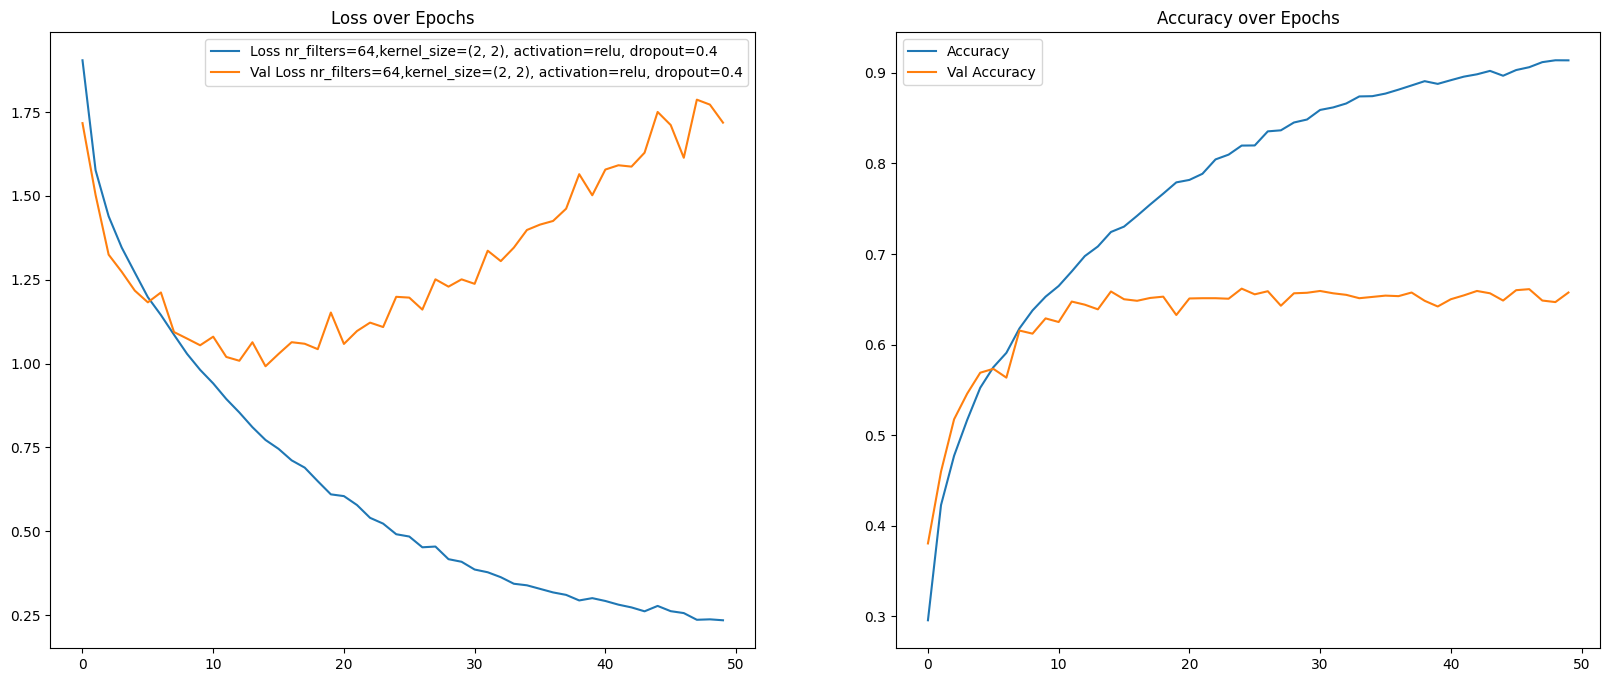

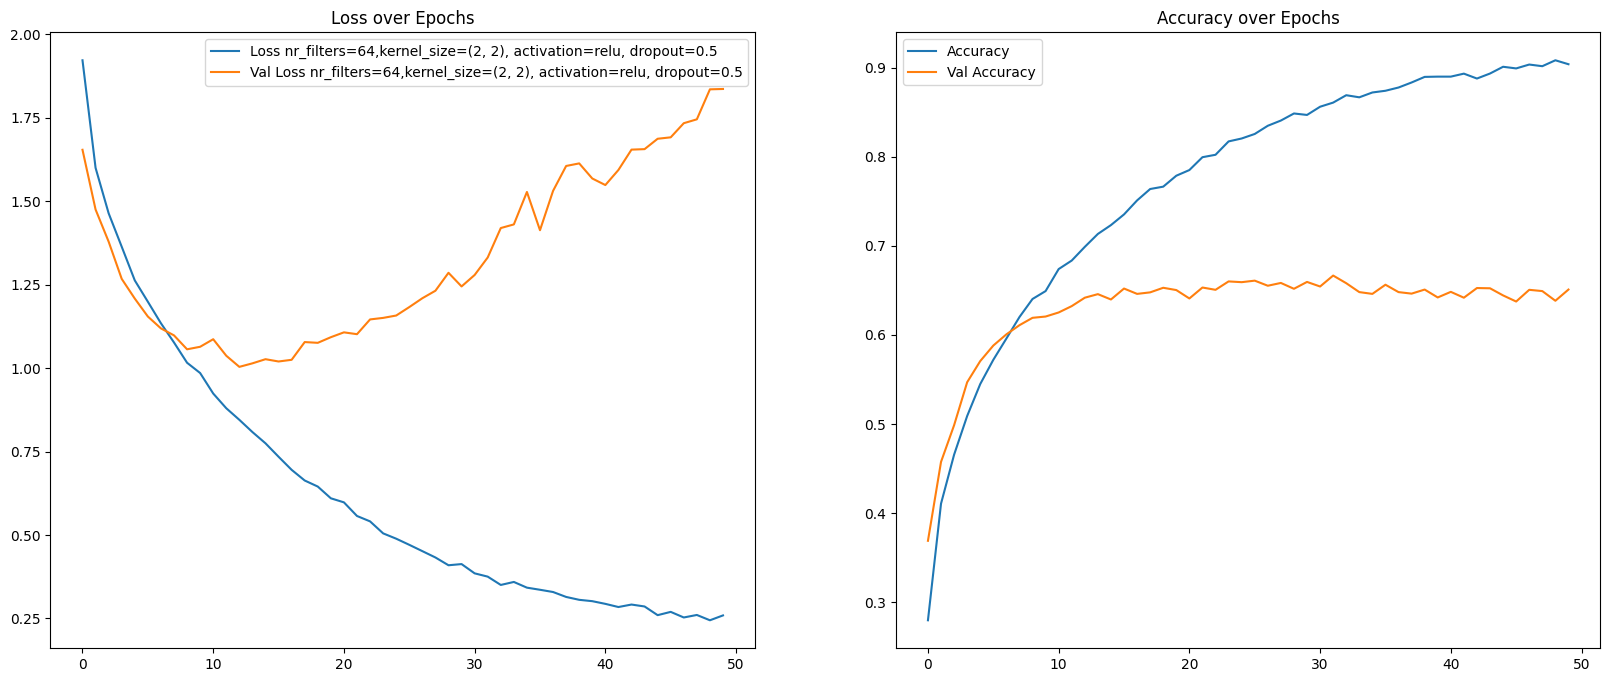

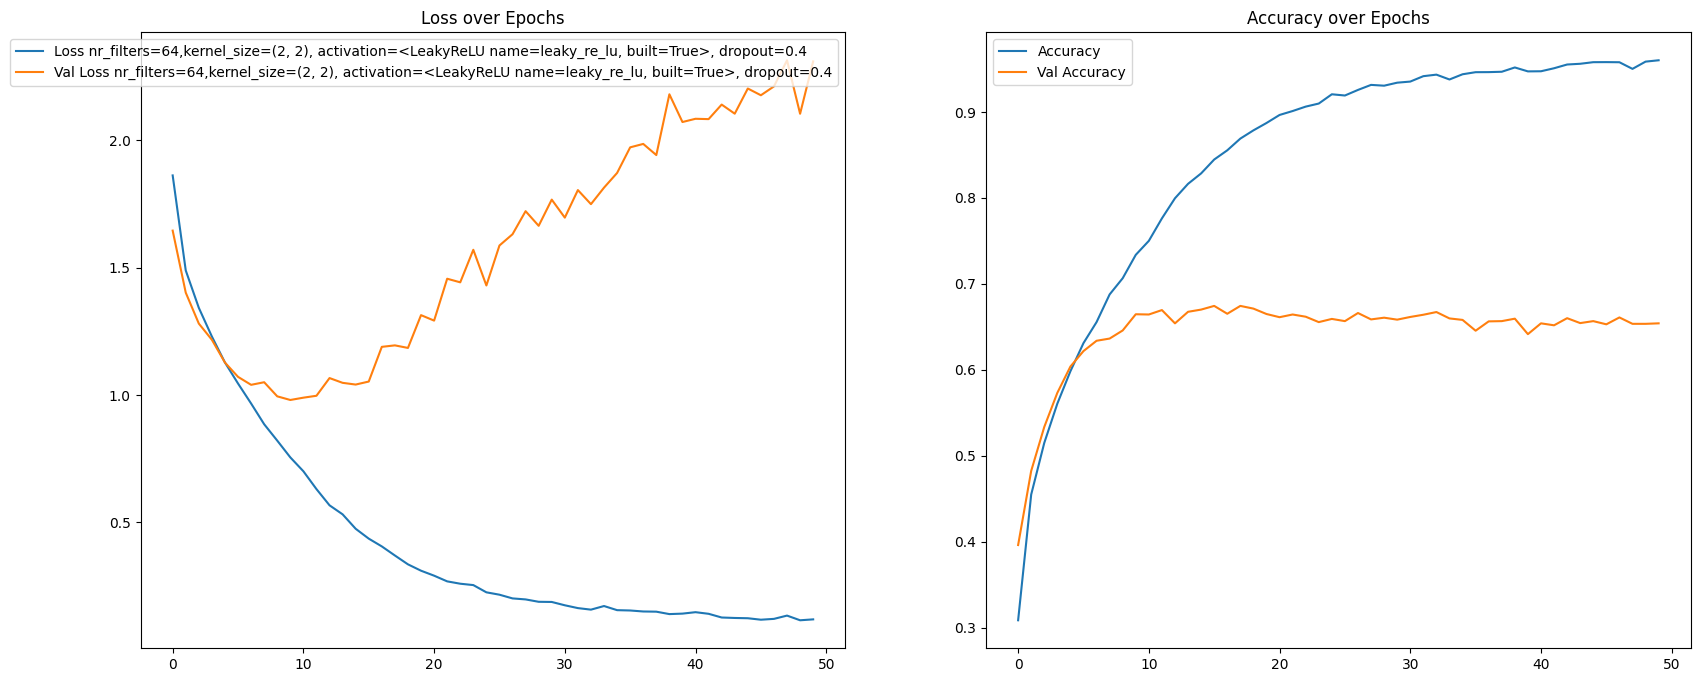

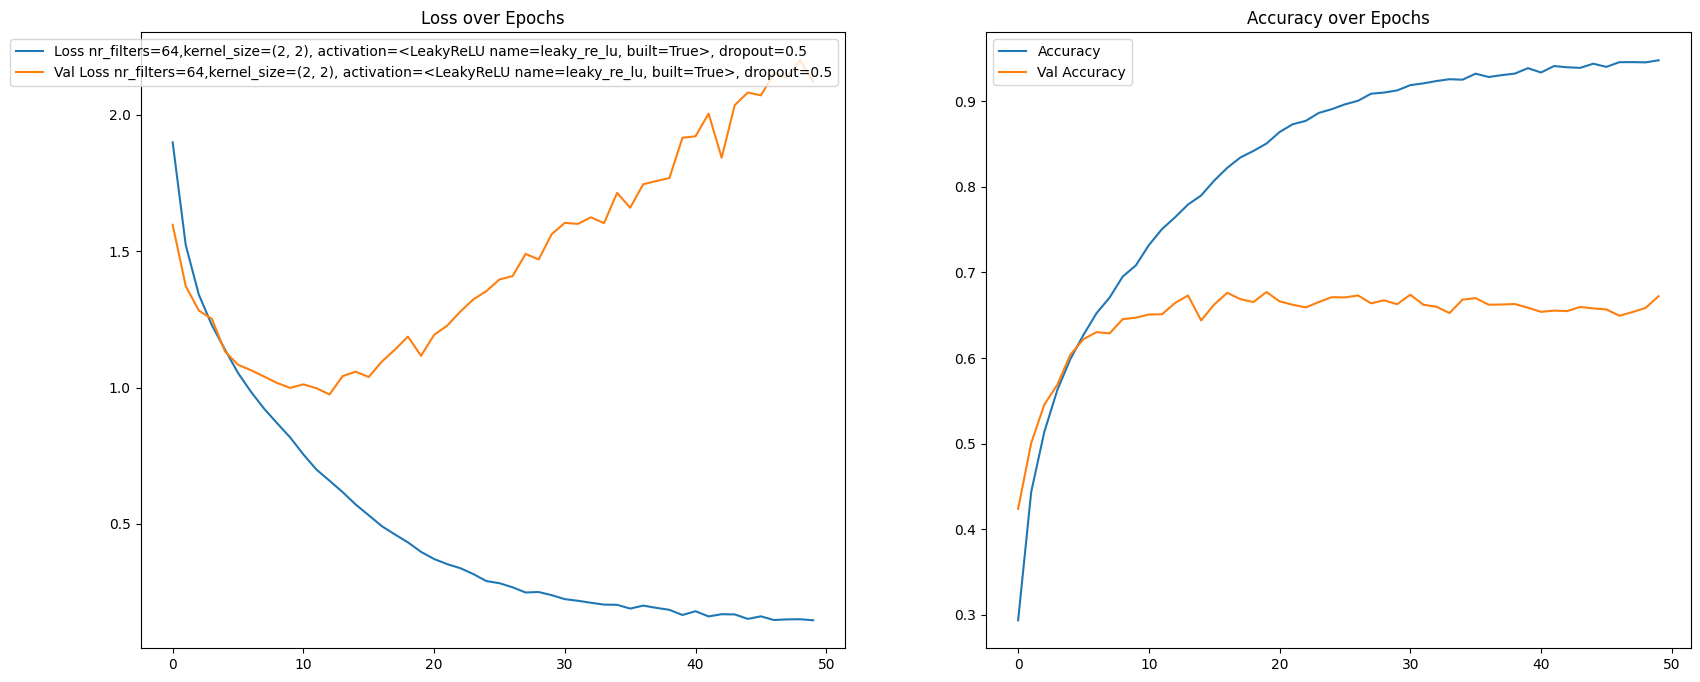

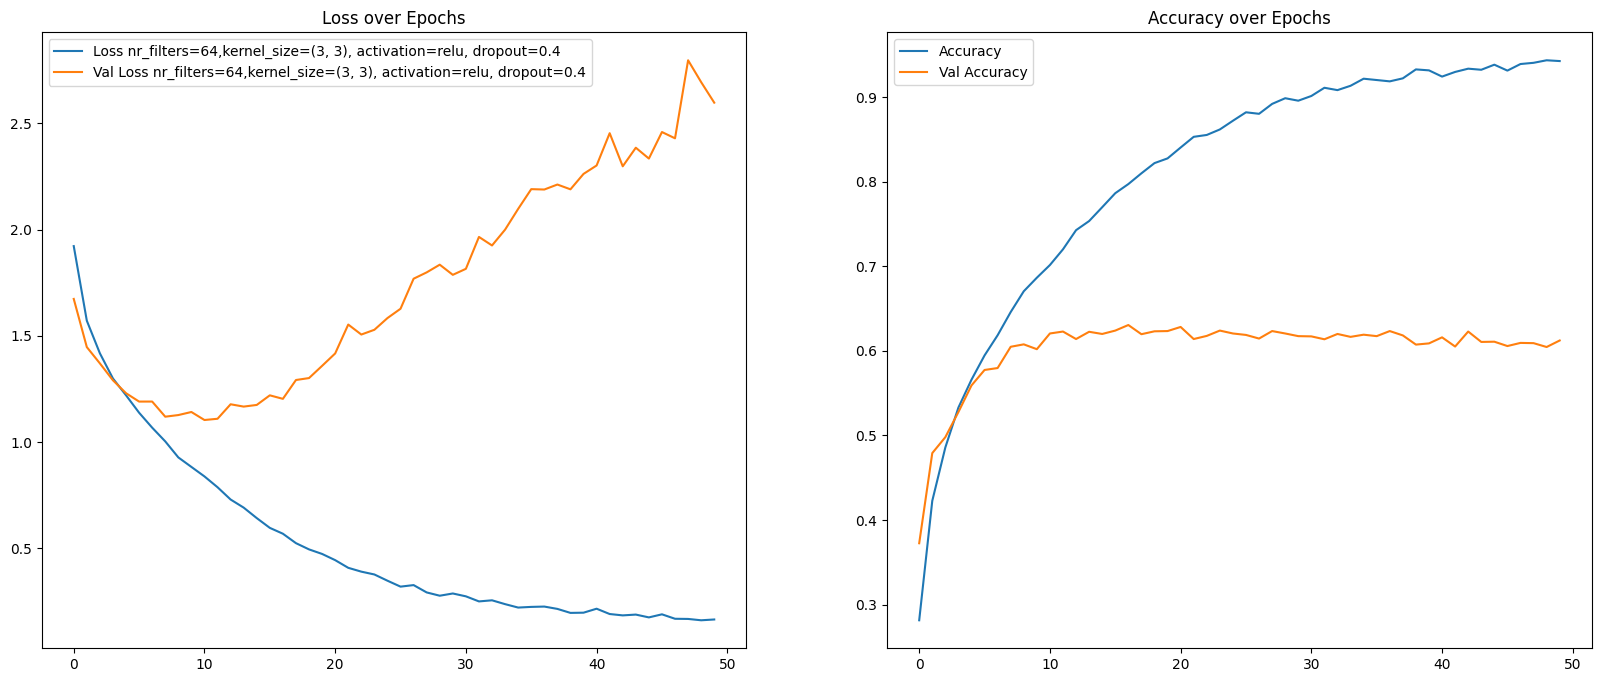

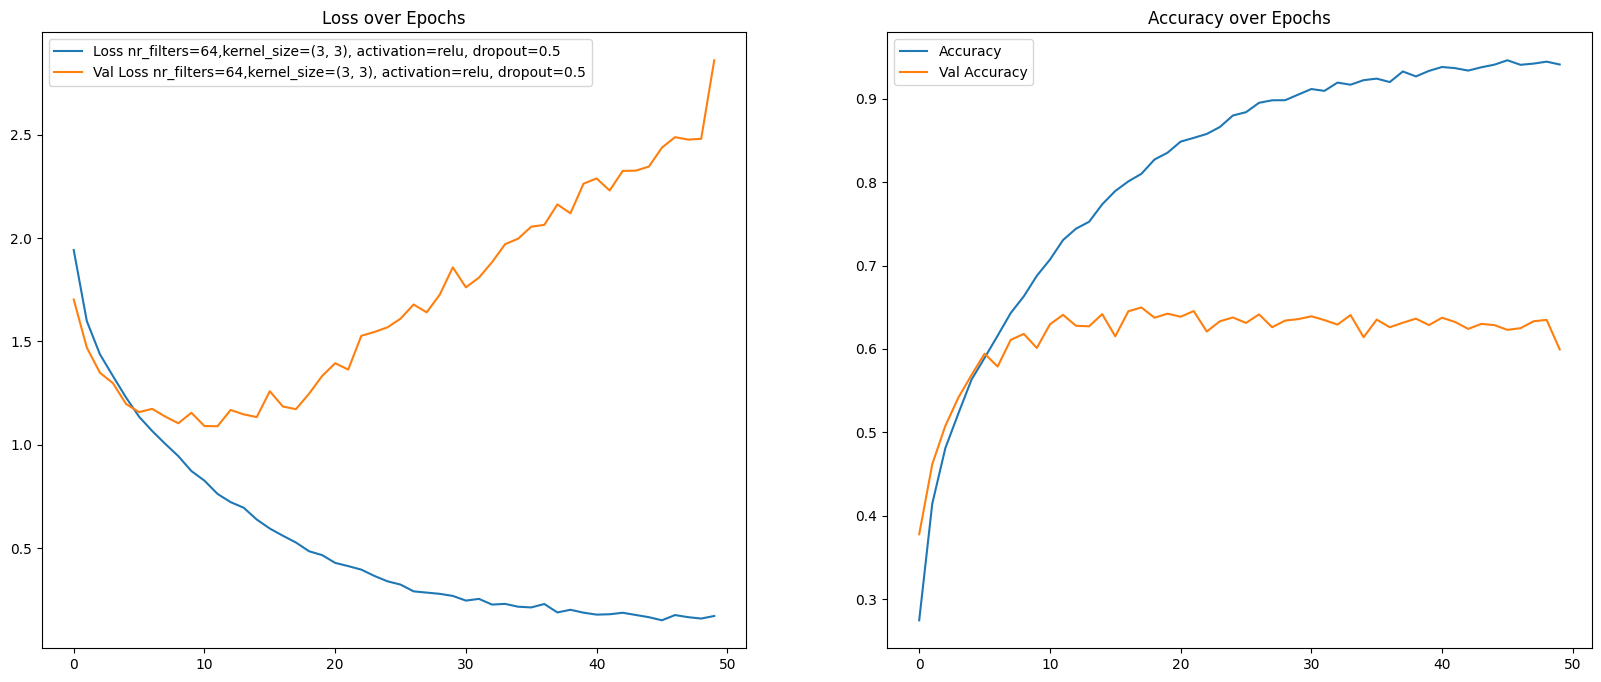

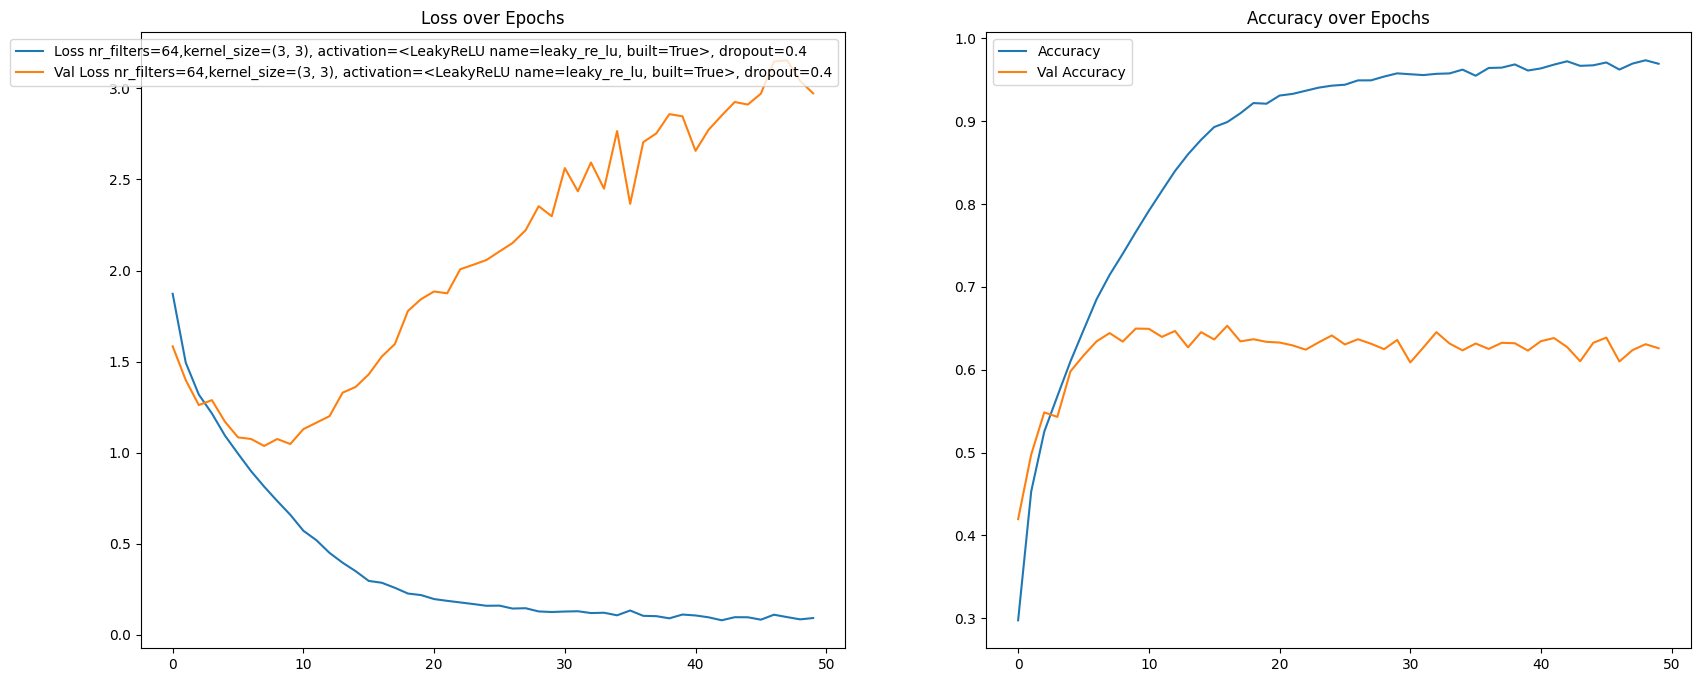

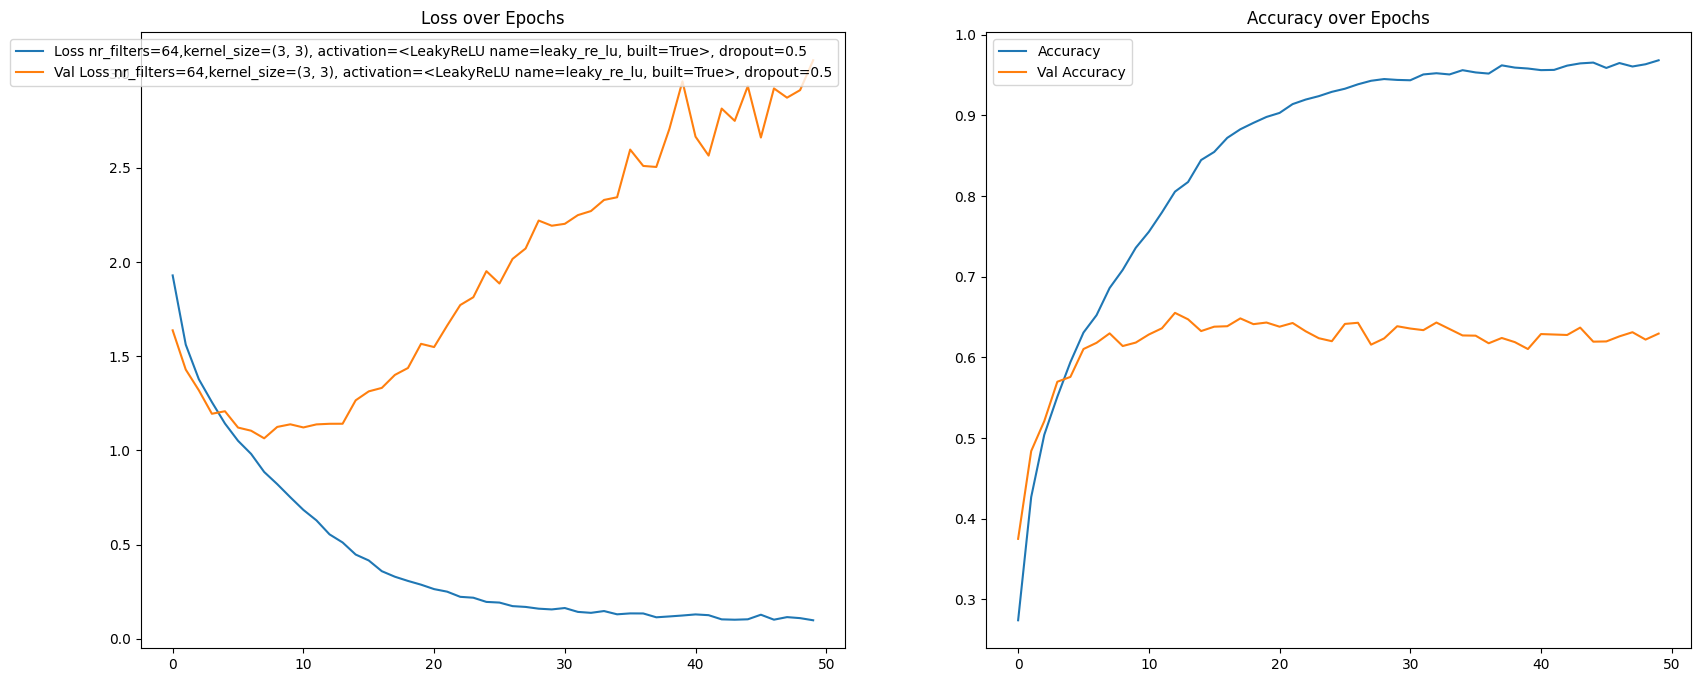

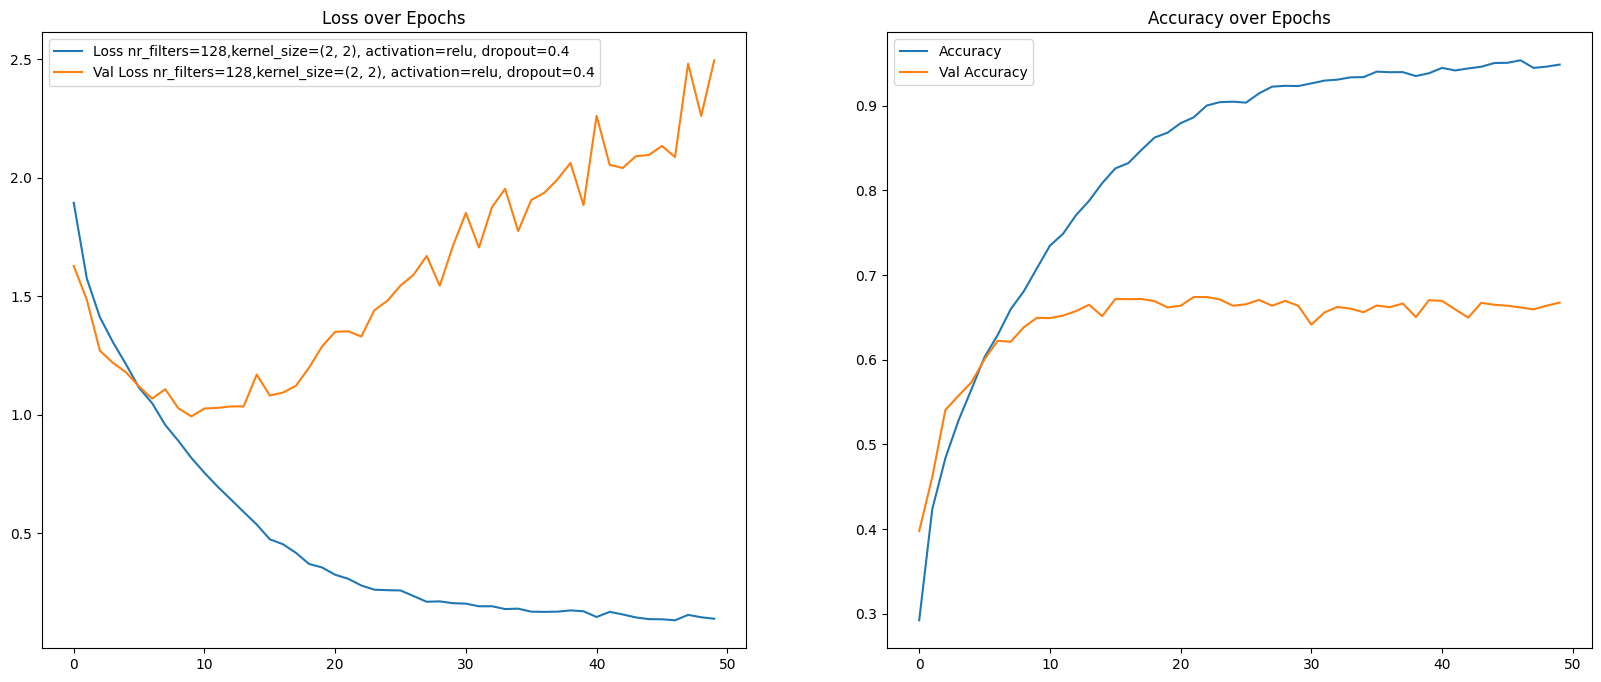

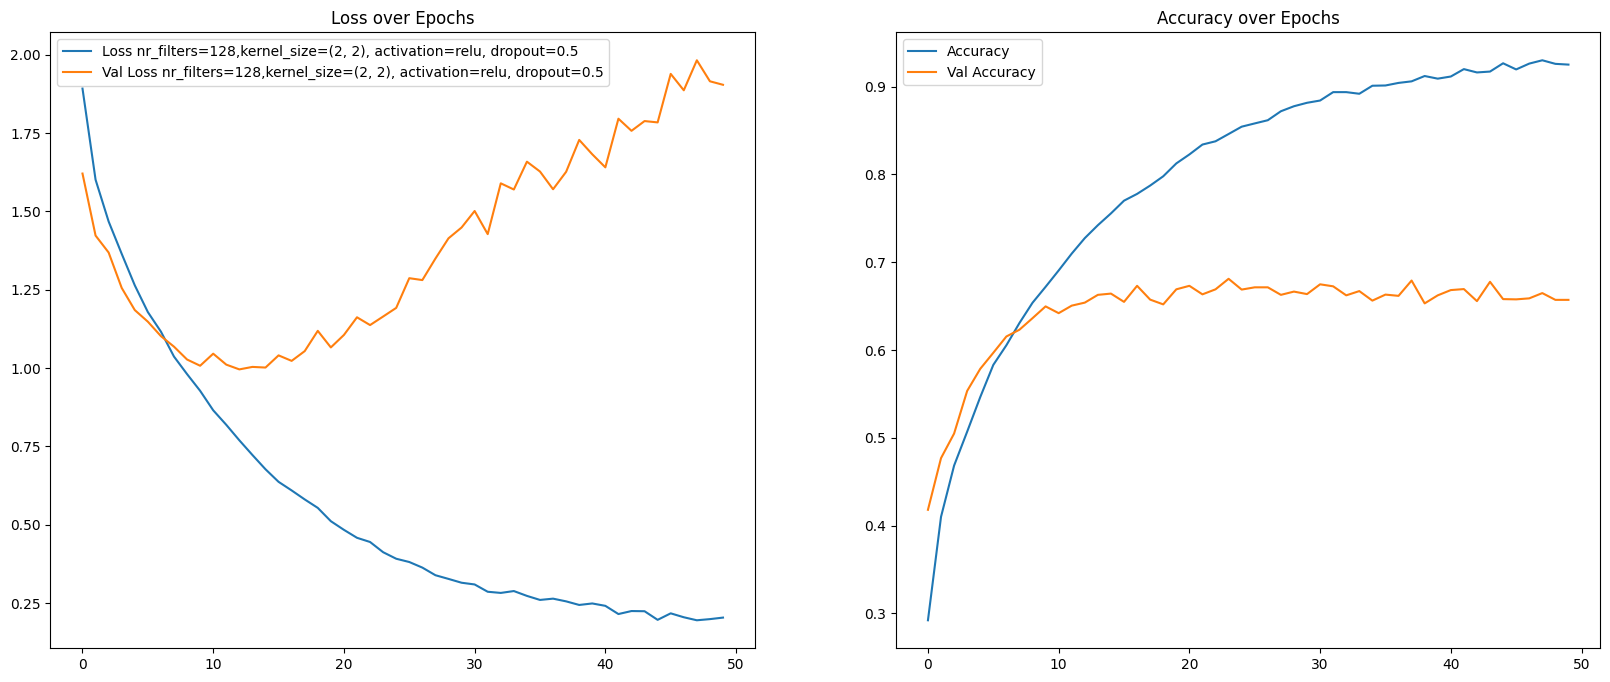

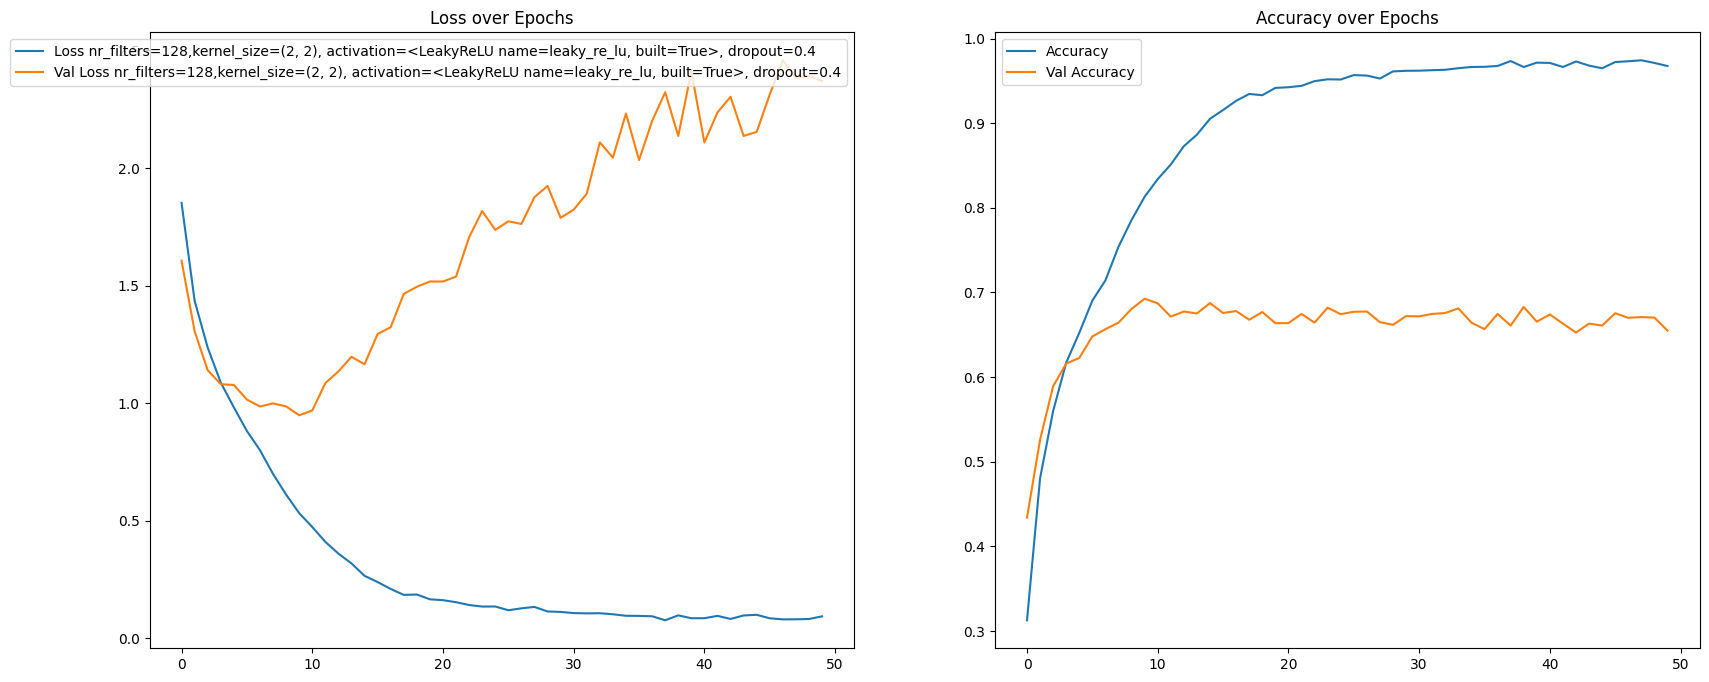

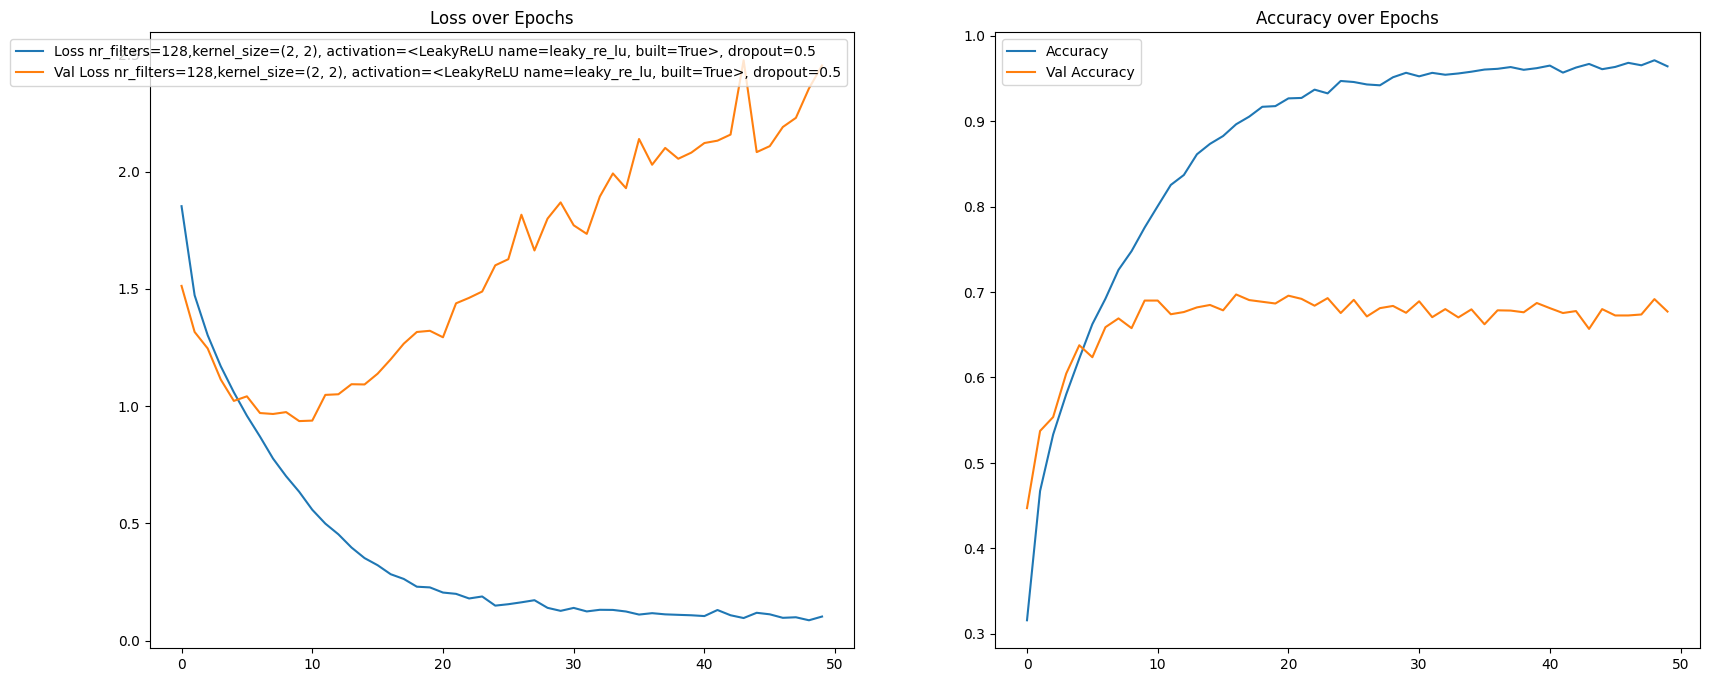

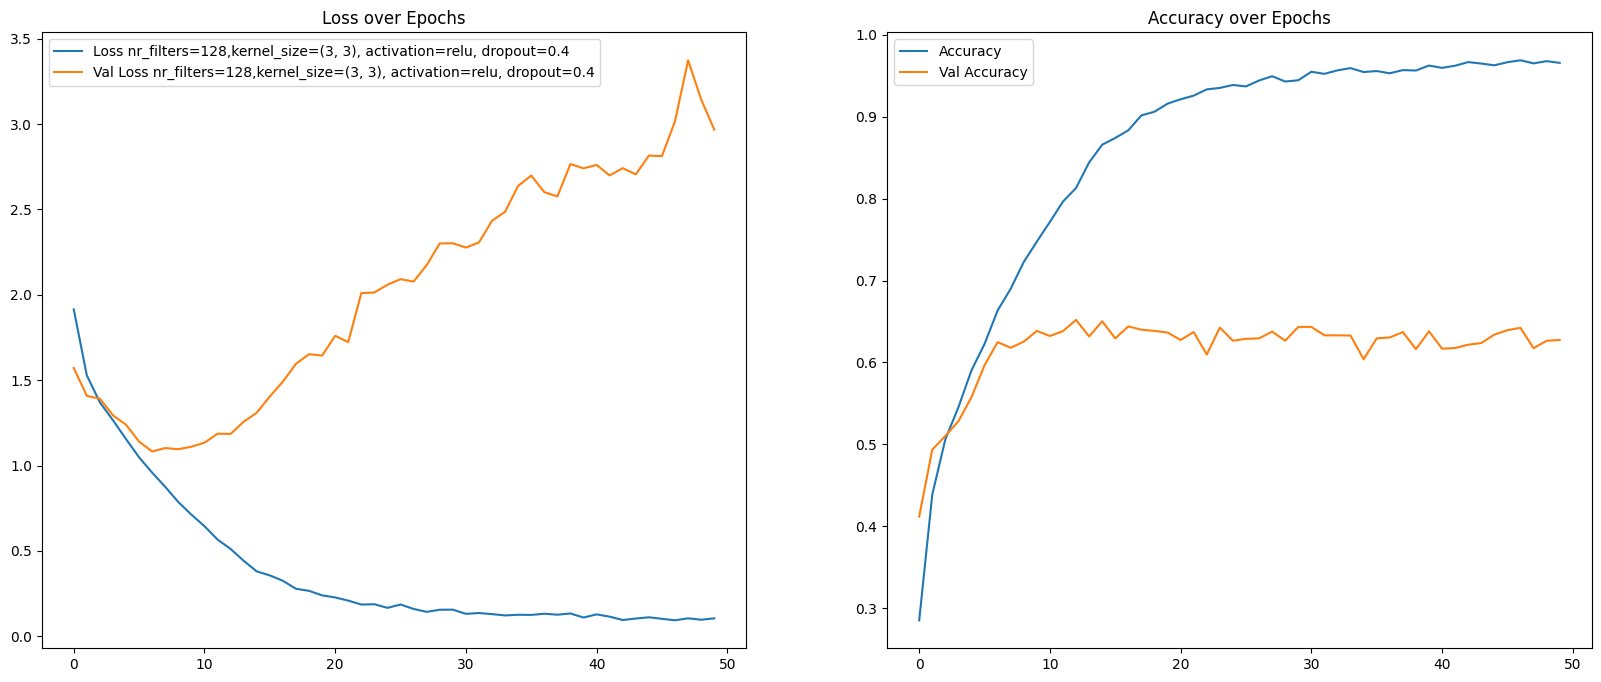

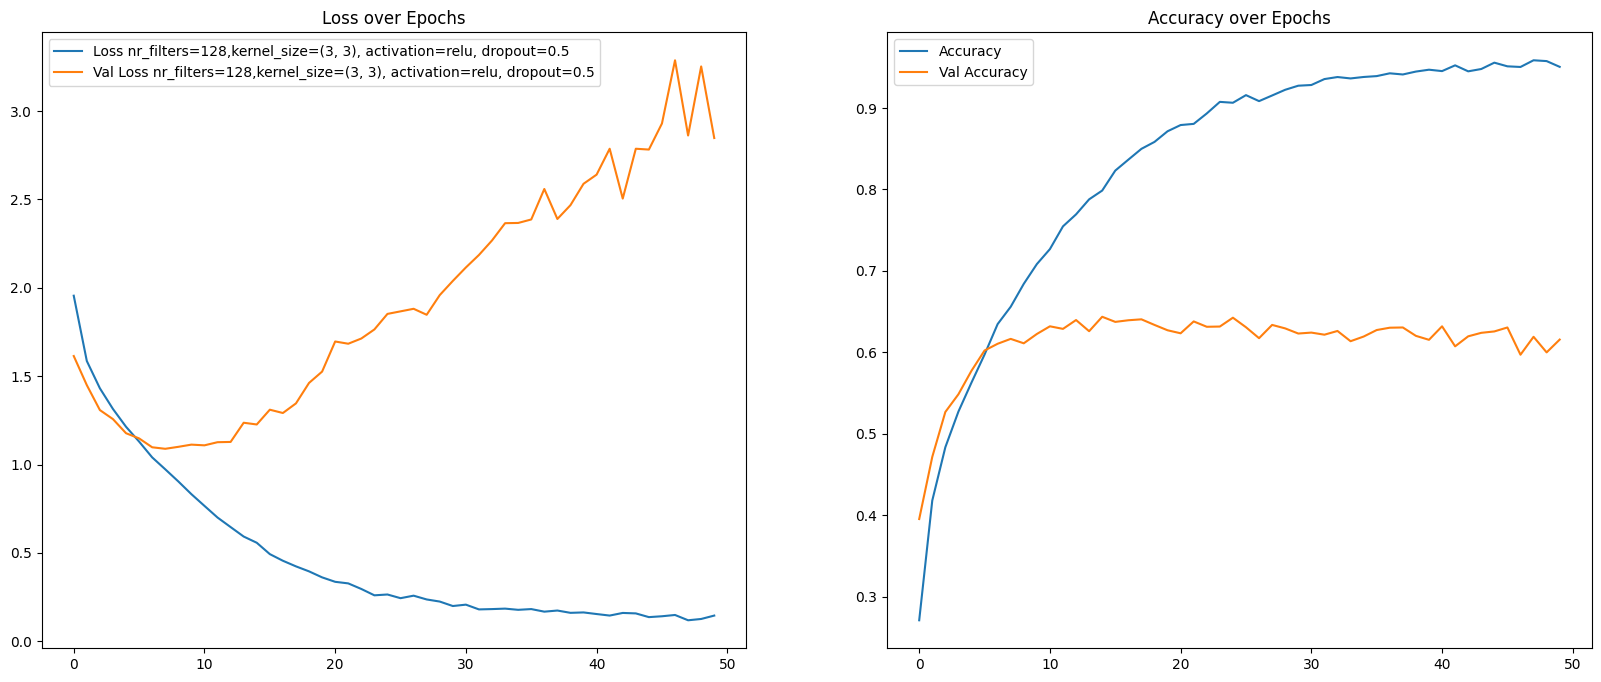

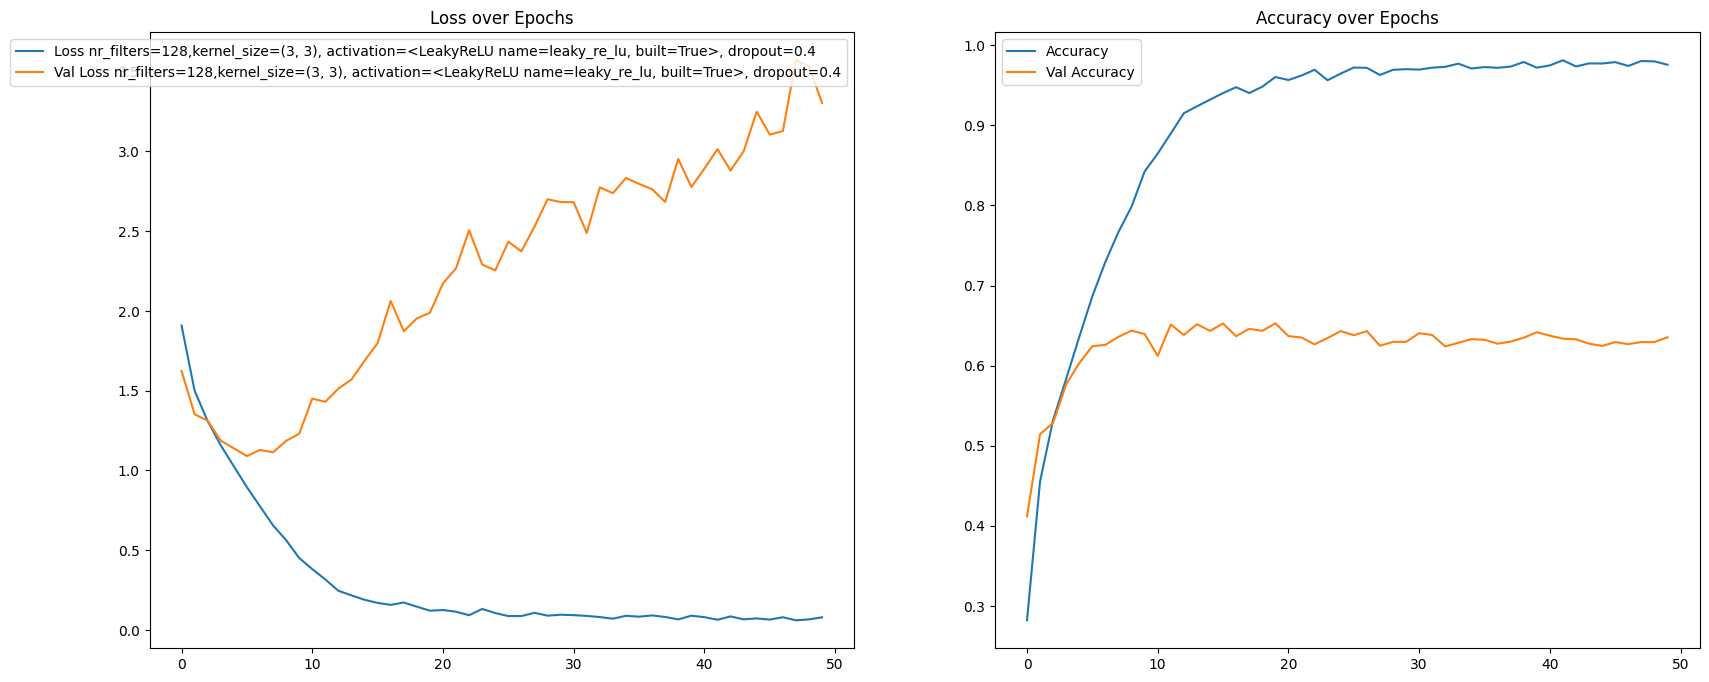

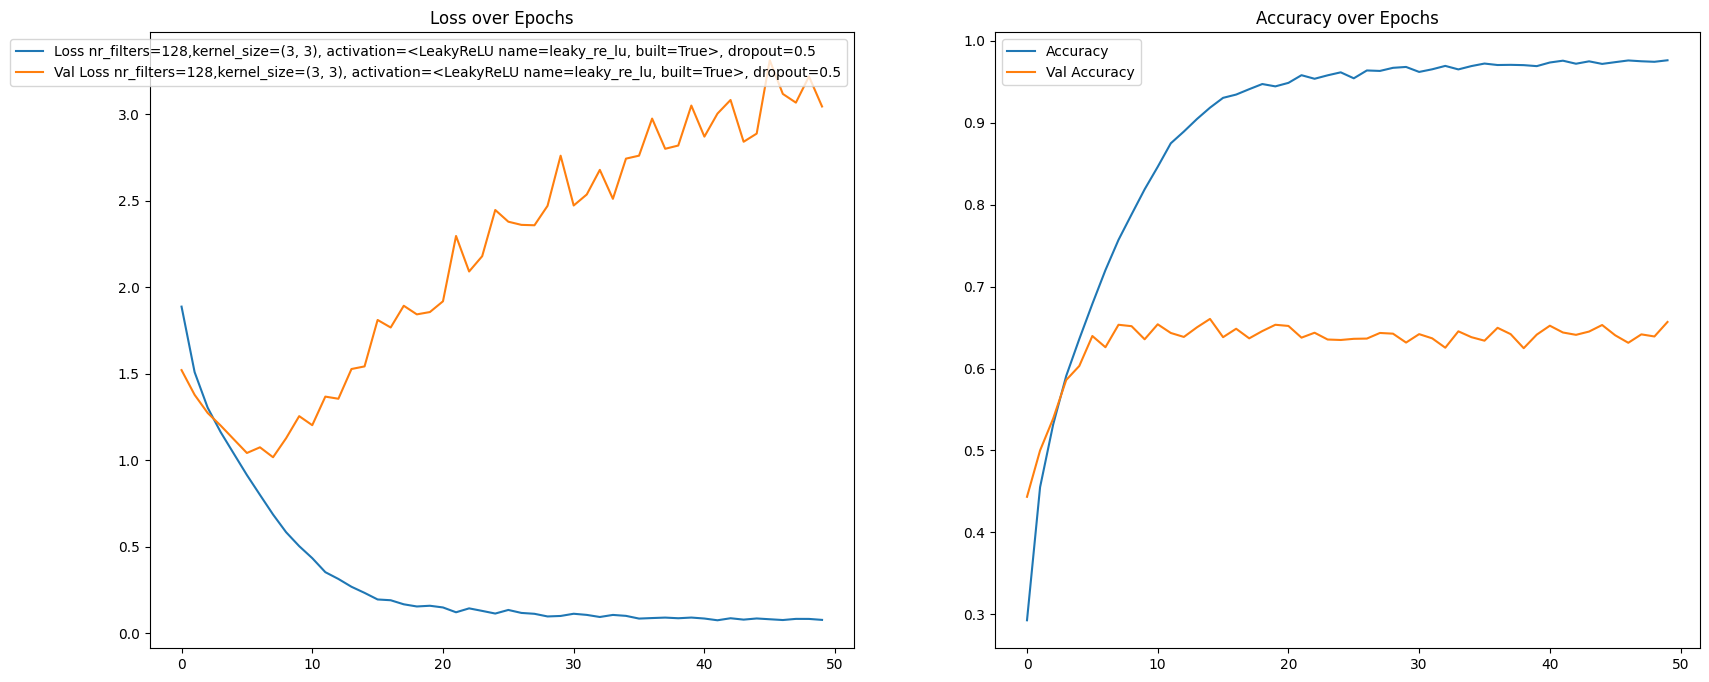

In [18]:
for label, history in histories:
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

We can notice that the model overfit after the 10-15th iteration, so we will only take into consideration what happens before the 10th epoch and then change in our final model the number of epochs from 50 to something between 10-15.

We can see that the best curves are for the models:
- <128, (3,3), leaky, 0.5> with 8-9-10 iterations
- <128, (2,2), leaky, 0.4> with 10-11 iterations
- <128, (2,2), leaky, 0.5> with 10-11 iterations
- <64, (2,2), leaky, 0.4> with 12-13 iterations
- <64, (2,2), leaky, 0.5> with 12-13 iterations

### CHECK FOR MNIST DATASET

MNIST is a dataset containing only black and white numbers, so the images are not as complex as in CIFAR-10. We can definitely keep the hyperparameters found before and observe the loss & accuracy curves.

Let us try now for mnist dataset all the 5 models found before and see their curves. (number of epochs/iterations will be kept 50 for now).

In [19]:
histories = []

#1st model
model = Sequential([
    # First convolutional layer - extract data 
    Input(shape=(32,32,1)),
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer - capture more intricate patterns
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer - capture more intricate patterns
    Conv2D(128*2, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Fully connected layer
    Flatten(),
    Dense(128, activation=LeakyReLU(negative_slope=0.01)), # simiar layer to previous simple NN laboratory
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_mnist_train_final, y_mnist_train_reduced,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=50,
                    batch_size=32,
                    verbose=0)


# Save for plotting
label = f"nr_filters=128,kernel_size=(3,3), activation=leaky, dropout=0.5"
histories.append((label, history))


    

In [20]:
# the other 4 models as well:
configs = [
    (128, (2,2), LeakyReLU(negative_slope=0.01), 0.5),
    (128, (2,2), LeakyReLU(negative_slope=0.01), 0.4),
    (64, (2,2), LeakyReLU(negative_slope=0.01), 0.4),
    (64, (2,2), LeakyReLU(negative_slope=0.01), 0.5)
]

for nr_filters_layer_1_option, kernel_size_option, activation_option, dropout_size in configs:
    print(f"Training model with: nr_filters_layer_1={nr_filters_layer_1_option}, kernel_size={kernel_size_option}, activation={activation_option}, dropout_size={dropout_size}")
    
    model = Sequential([
        Input(shape=(32,32,1)),
        Conv2D(nr_filters_layer_1_option, kernel_size=kernel_size_option, activation=activation_option),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(nr_filters_layer_1_option, kernel_size=kernel_size_option, activation=activation_option),
        MaxPooling2D(pool_size=(2,2)),

        Conv2D(nr_filters_layer_1_option * 2, kernel_size=kernel_size_option, activation=activation_option),
        MaxPooling2D(pool_size=(2,2)),

        Flatten(),
        Dense(128, activation=activation_option),
        Dropout(dropout_size),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_mnist_train_final, y_mnist_train_reduced,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=32,
                        verbose=0)

    label = f"nr_filters={nr_filters_layer_1_option},kernel_size={kernel_size_option}, activation=leaky, dropout={dropout_size}"
    histories.append((label, history))

Training model with: nr_filters_layer_1=128, kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu_5, built=False>, dropout_size=0.5
Training model with: nr_filters_layer_1=128, kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu_6, built=False>, dropout_size=0.4
Training model with: nr_filters_layer_1=64, kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu_7, built=False>, dropout_size=0.4
Training model with: nr_filters_layer_1=64, kernel_size=(2, 2), activation=<LeakyReLU name=leaky_re_lu_8, built=False>, dropout_size=0.5


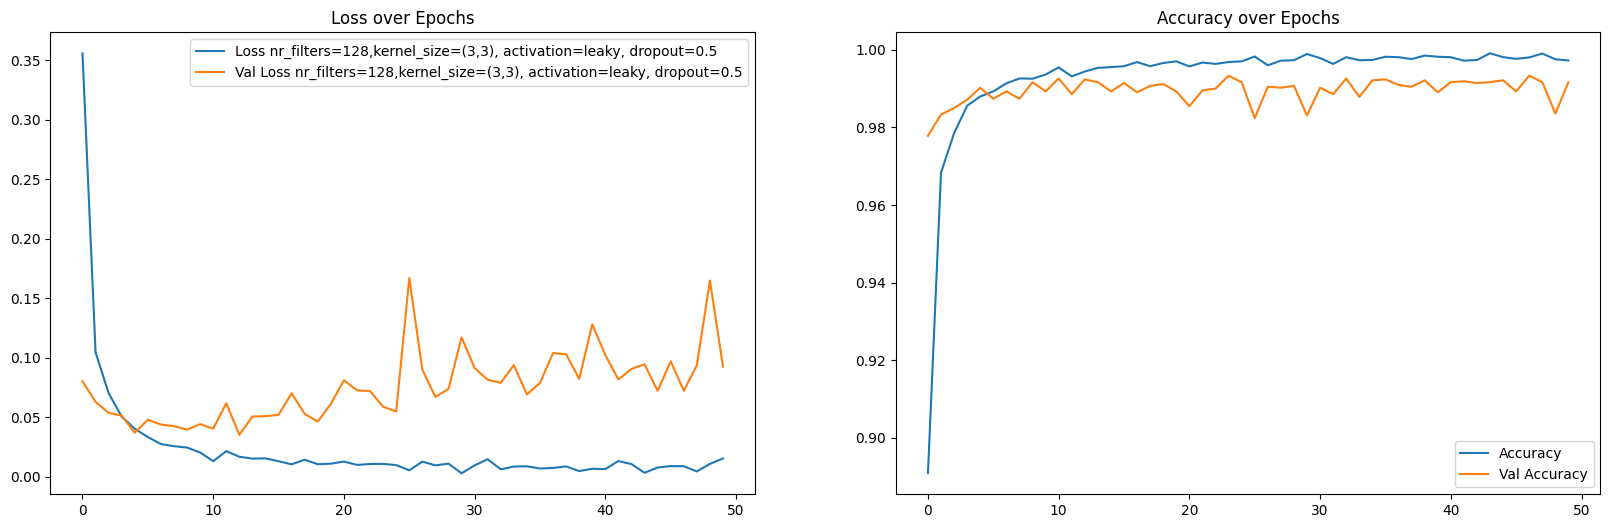

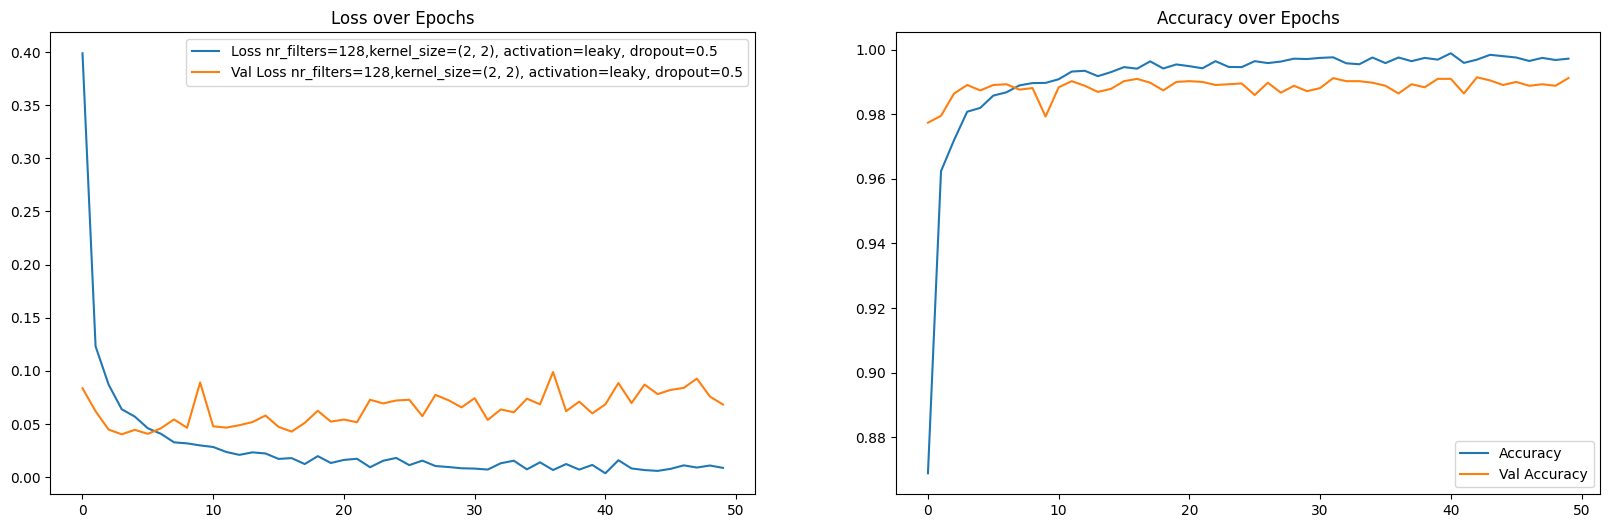

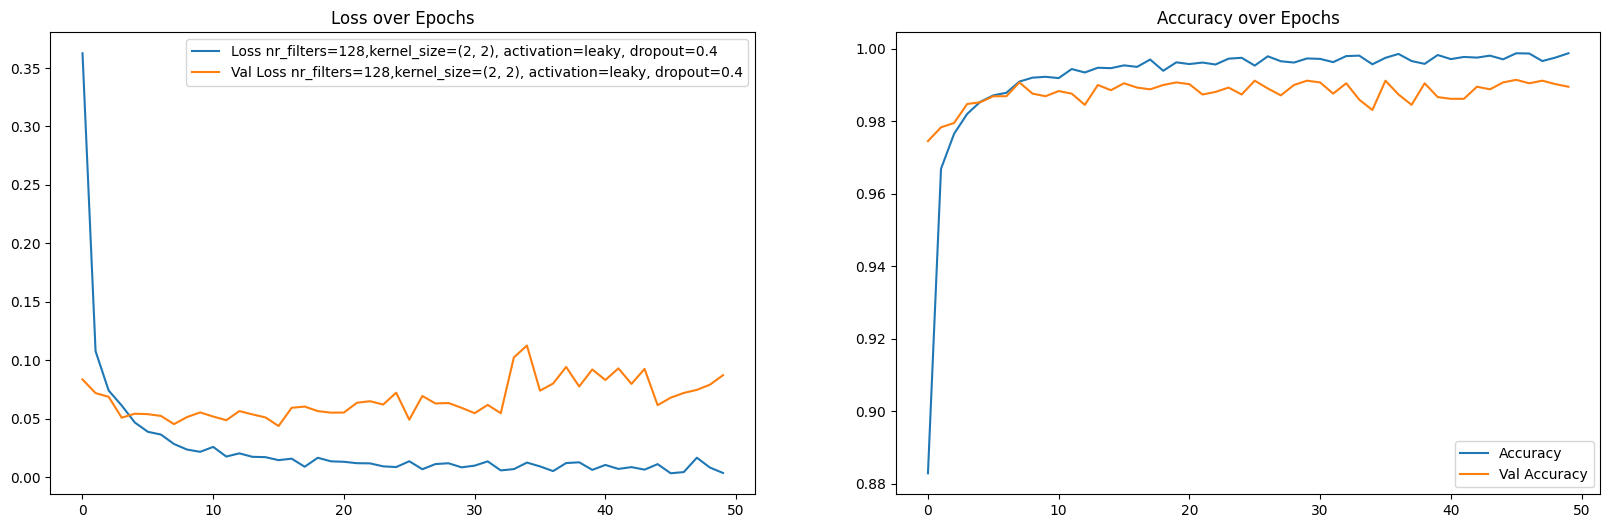

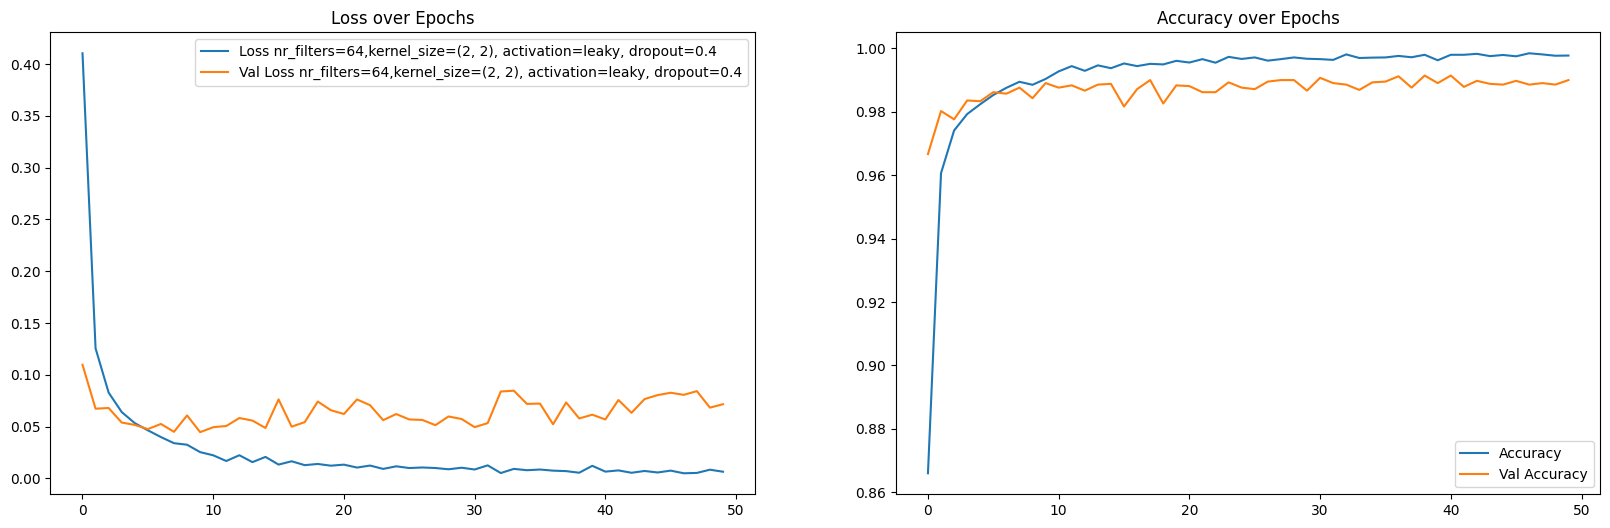

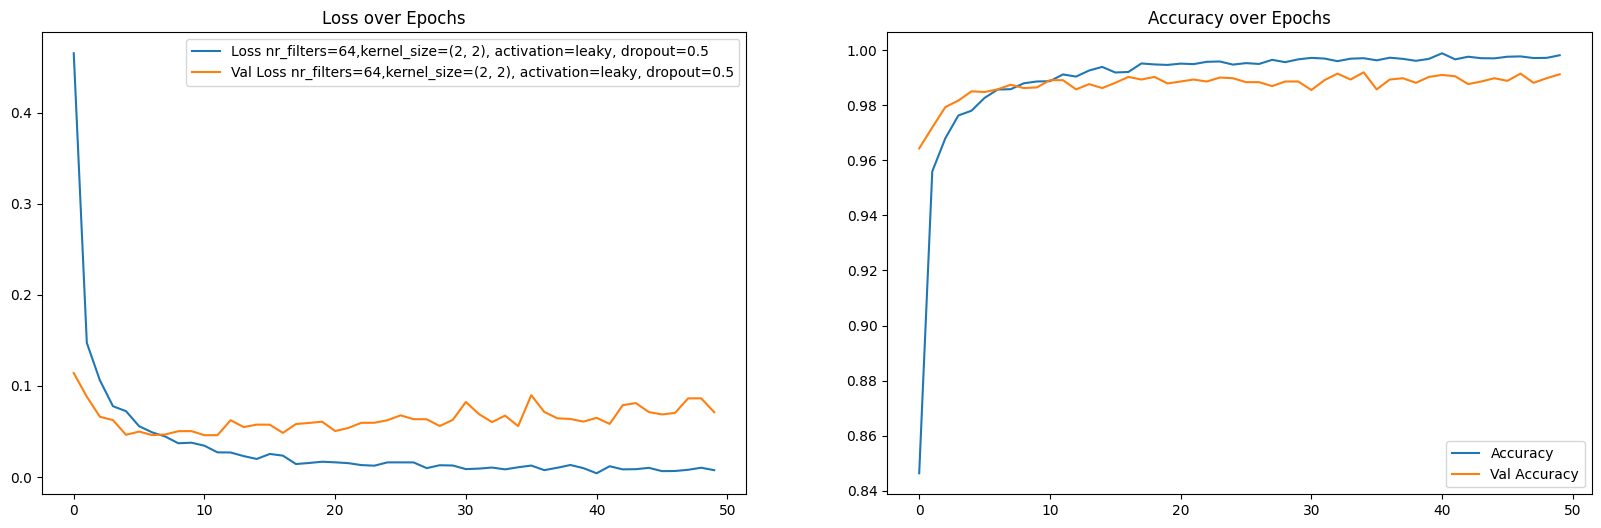

In [23]:
for label, history in histories:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

We can see that:
- <128, (3,3), leaky, 0.5> with 8-9-10 iterations
- <128, (2,2), leaky, 0.4> with 10-11 iterations
  
Have the best results in this case.

Considering that we have less epoch to go trough, so the time of training and computational power is reduced for <128, (3,3), leaky, 0.5> with 8-9-10 iterations, we will stick with this model. Also, most of the modern models have (3,3) kernels, so this is a more classic case to chose.

#### Final choice : <128, (3,3), leaky, 0.5> with 8-9-10 iterations

### B. AlexNet Implementation

- Implement a CNN inspired by AlexNet: https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

Original AlexNet Architecture:

- Input: 227x227x3 (RGB images)
- Conv1: 96 filters, size (11x11), stride 4 → ReLU → MaxPool
- Conv2: 256 filters, (5x5) → ReLU → MaxPool
- Conv3: 384 filters, (3x3) → ReLU
- Conv4: 384 filters, (3x3) → ReLU
- Conv5: 256 filters, (3x3) → ReLU → MaxPool
- Flatten
- Dense1: 4096 neurons → ReLU → Dropout
- Dense2: 4096 neurons → ReLU → Dropout
- Output: 1000 classes → Softmax

- **padding='same'** tells the layer to add zeros around the border of the input so that the output size is the same as the input size, if the stride is 1. Without padding, the output gets smaller after every convolution. Too many layers = tiny feature maps too fast.

I chose a kernel of 3x3 for all conv layers because our images are much smaller, and the Dense models have less neurons, because, again, the images are **8 times smaller** than the ones in the dataset used originally by AlexNet.

### CIFAR-10 ALEXNET

In [16]:
model_alex_net_cifar_10 = Sequential([
    Input(shape=(32, 32, 3)),  # CIFAR-10 RGB images

    Conv2D(96, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512,activation='relu'),  # Scaled down from 4096
    Dropout(0.5),

    Dense(512,activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

### MNIST ALEXNET

In [17]:
model_alex_net_mnist = Sequential([
    Input(shape=(32, 32, 1)),  # MNIST images iwth 1 channel

    Conv2D(96, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512,activation='relu'),  # Scaled down from 4096
    Dropout(0.5),

    Dense(512,activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

### 3. Performance Comparison

- Evaluate **test accuracy**, training speed, and **model size**.
- Plot and discuss:
   - Training and validation accuracy/loss curves.
   - Confusion matrix for both models.
- Compare:
   - Which model generalizes better?
   - Which model is more efficient?
   - Implementation challenges.

Let us first rewrite my models for the 2 datasets, because we are done with deciding all the hyperparameters.

Also, let us keep a history array, similar to how we have done before, to be able too see the accuracy and loss curves HERE.

Moreover, I will keep the training duration.

In [18]:
histories_comparison = []

### CIFAR-10 - MY APPROACH
### <128, (3,3), leaky, 0.5> with 8-9-10 iterations

In [19]:

model_my_approach_cifar_10 = Sequential([
    # First convolutional layer - extract data 
    Input(shape=(32,32,3)),
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

                    # Second convolutional layer - capture more intricate patterns
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer - capture more intricate patterns
    Conv2D(128*2, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Fully connected layer
    Flatten(),
    Dense(128, activation=LeakyReLU(negative_slope=0.01)), # simiar layer to previous simple NN laboratory
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_my_approach_cifar_10.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

history = model_my_approach_cifar_10.fit(X_cifar_train_final, y_cifar_train_reduced,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=9,
                    batch_size=32,
                    verbose=0)

end_time = time.time()
training_duration_model_my_approach_cifar_10 = end_time - start_time # training time

# Save for plotting
label = f"CIFAR-10 - MY APPROACH: nr_filters=128, kernel_size=(3,3), activation=leaky, dropout=0.5"
histories_comparison.append((label, history))


    

### MNIST - MY APPROACH
### <128, (3,3), leaky, 0.5> with 8-9-10 iterations

In [20]:
model_my_approach_mnist = Sequential([
    # First convolutional layer - extract data 
    Input(shape=(32,32,1)),
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

                    # Second convolutional layer - capture more intricate patterns
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer - capture more intricate patterns
    Conv2D(128*2, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Fully connected layer
    Flatten(),
    Dense(128, activation=LeakyReLU(negative_slope=0.01)), # simiar layer to previous simple NN laboratory
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_my_approach_mnist.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

history = model_my_approach_mnist.fit(X_mnist_train_final, y_mnist_train_reduced,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=9,
                    batch_size=32,
                    verbose=0)

end_time = time.time()
training_duration_model_my_approach_mnist = end_time - start_time # training time


# Save for plotting
label = f"MNIST - MY APPROACH: nr_filters=128, kernel_size=(3,3), activation=leaky, dropout=0.5"
histories_comparison.append((label, history))

### TRAIN & ANALYSE ALSO THE ALEXNET MODELS

In [21]:
# Compile the model
model_alex_net_cifar_10.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

history = model_alex_net_cifar_10.fit(X_cifar_train_final, y_cifar_train_reduced,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=10,
                    batch_size=32,
                    verbose=0)

end_time = time.time()
training_duration_model_alex_net_cifar_10 = end_time - start_time # training time


# Save for plotting
label = f"CIFAR-10 - ALEXNET: nr_filters=128, kernel_size=(3,3), activation=leaky, dropout=0.5"
histories_comparison.append((label, history))

In [22]:
# Compile the model
model_alex_net_mnist.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

history = model_alex_net_mnist.fit(X_mnist_train_final, y_mnist_train_reduced,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=10,
                    batch_size=32,
                    verbose=0)

end_time = time.time()
training_duration_model_alex_net_mnist = end_time - start_time # training time


# Save for plotting
label = f"MNIST - ALEXNET: nr_filters=128, kernel_size=(3,3), activation=leaky, dropout=0.5"
histories_comparison.append((label, history))

Let us see the loss/accuracy curves

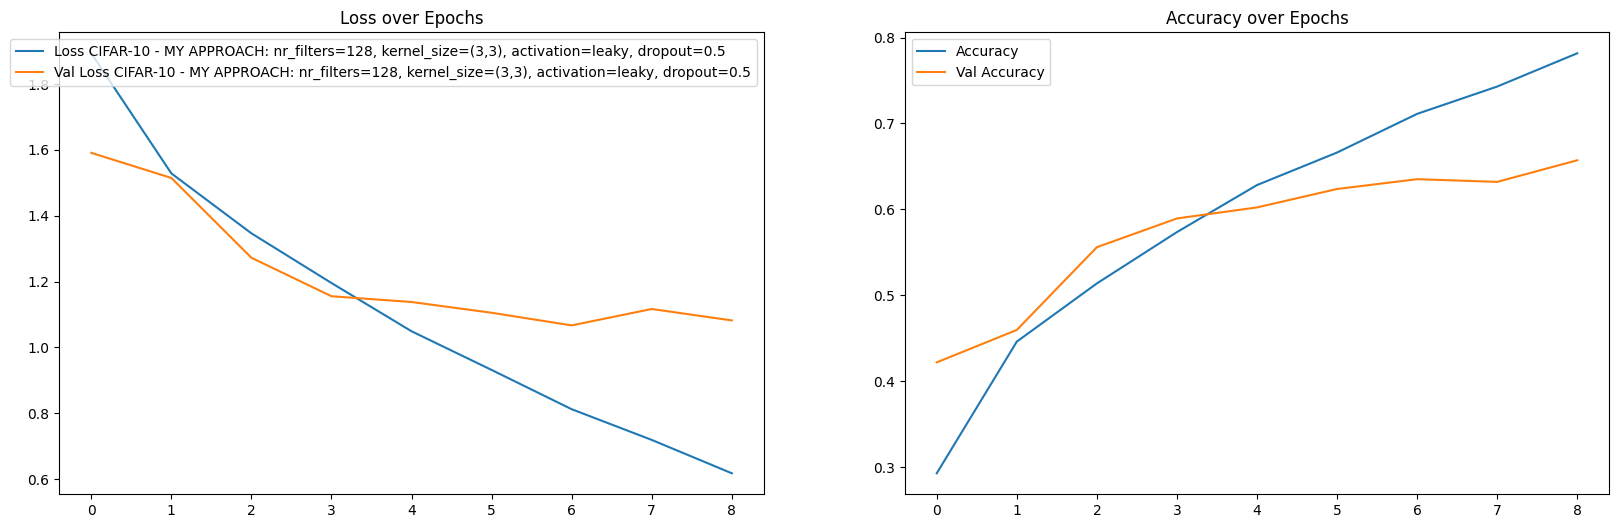

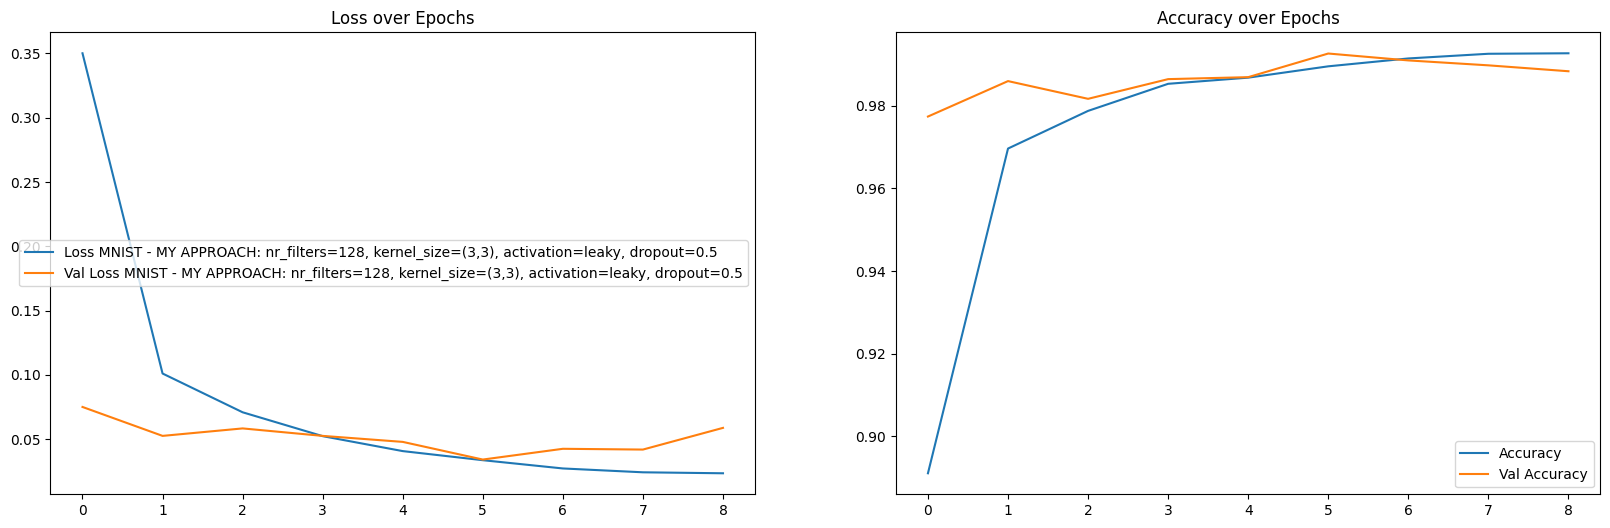

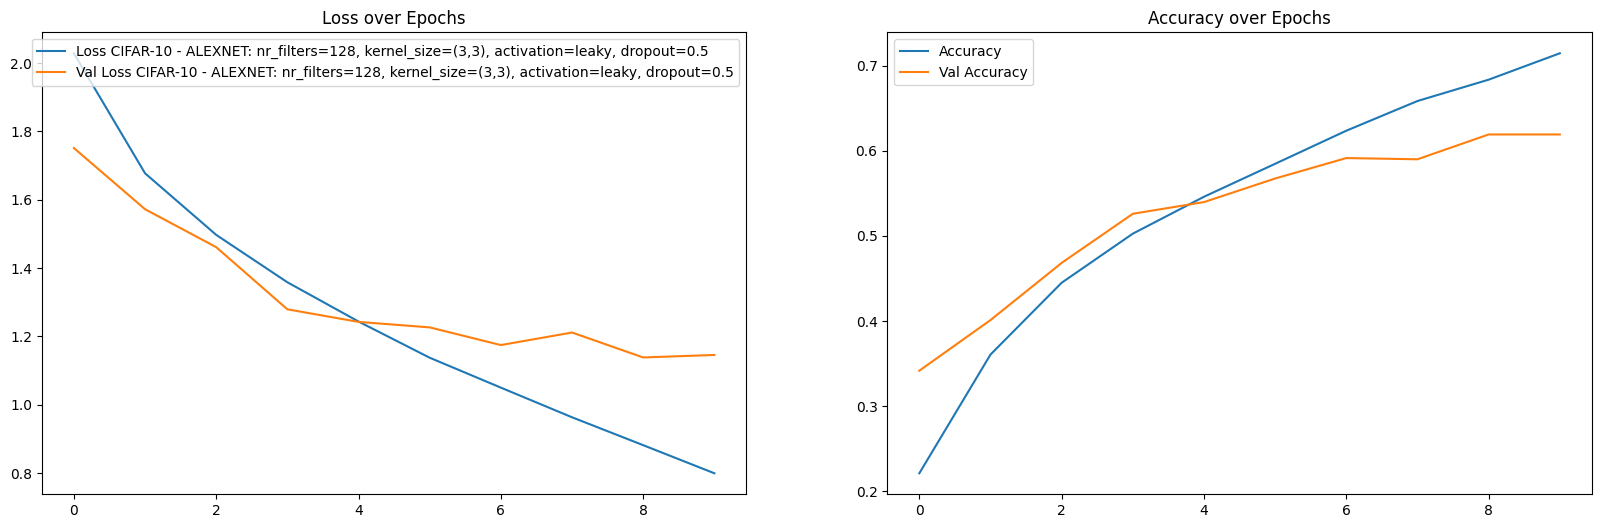

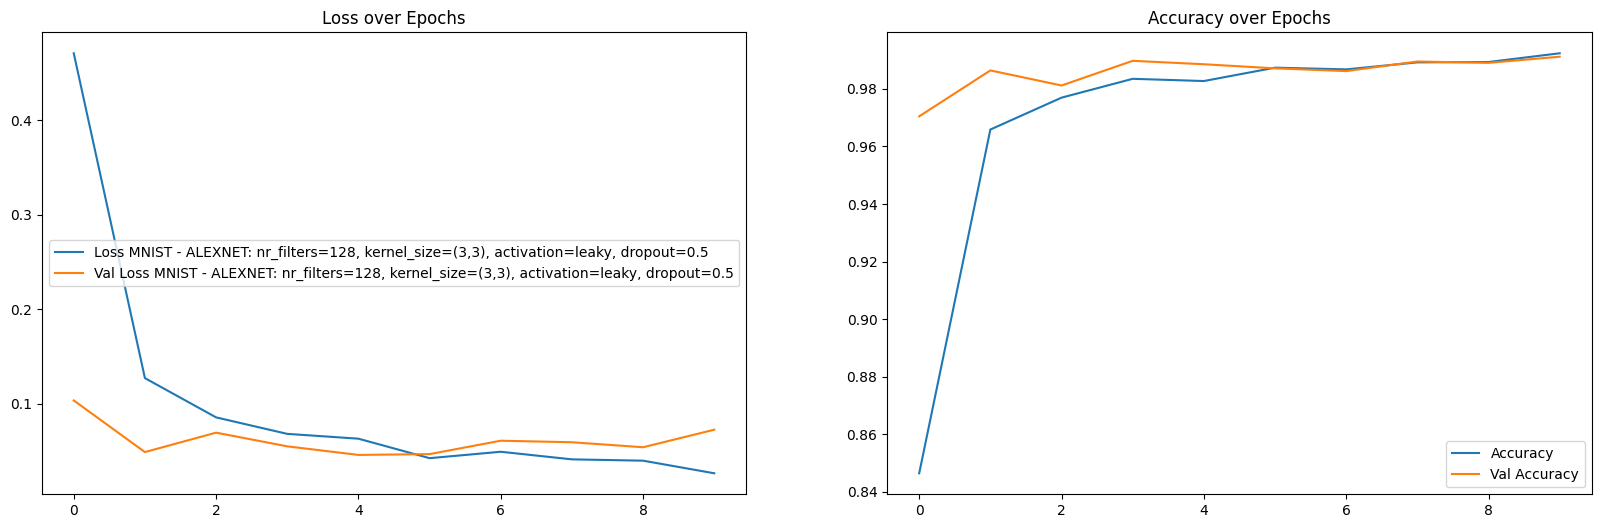

In [23]:
for label, history in histories_comparison:
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()

We can see that:
- for CIFAR-10 dataset:
   - the curves look pretty similar, the only notable difference being that in my approach, the number of epochs cannot be extended and should not be, because, for validation loss, we will get worse values (we start overfitting) and also the val accuracy becomes linear, showing that there can be no improvement. The training loss looks exactly the same as in AlexNet
   - in the AlexNet-inspired model, we can see that more epochs would mean better results (the validation curves will still decrease), but with the big disadgantage of computational resources needed (we have a much more complex model, with much more parameters)
 
- for the MNIST dataset:
   - the curves are almost exacly the same for both approaches
   - this is because the MNIST dataset is simpler and my approach, with a less-complex model than that inspired by AlexNet, provides good results.
   - we can see that even the number of epochs is enough for AlexNet, because the curves become linear, so they would not improve if we had more iterations.


### TEST ACCURACY & TRAINING SPEED & MODEL SIZE

In [24]:
test_loss, test_accuracy = model_my_approach_cifar_10.evaluate(X_cifar_test_final, y_cifar_test, verbose=0)
print(f"Test Accuracy model_my_approach_cifar_10: {test_accuracy:.4f}")

print(f"Training Time: {training_duration_model_my_approach_cifar_10:.2f} seconds")

model_my_approach_cifar_10.summary()

Test Accuracy model_my_approach_cifar_10: 0.6634
Training Time: 131.98 seconds


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,736,480 (6.62 MB)

 Trainable params: 578,826 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,157,654 (4.42 MB)

In [25]:
test_loss, test_accuracy = model_my_approach_mnist.evaluate(X_mnist_test_final, y_mnist_test, verbose=0)
print(f"Test Accuracy model_my_approach_mnist: {test_accuracy:.4f}")

print(f"Training Time: {training_duration_model_my_approach_mnist:.2f} seconds")

model_my_approach_mnist.summary()

Test Accuracy model_my_approach_mnist: 0.9881
Training Time: 167.58 seconds


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729,568 (6.60 MB)

 Trainable params: 576,522 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,153,046 (4.40 MB)

In [26]:
test_loss, test_accuracy = model_alex_net_cifar_10.evaluate(X_cifar_test_final, y_cifar_test, verbose=0)
print(f"Test Accuracy model_alex_net_cifar_10: {test_accuracy:.4f}")

print(f"Training Time: {training_duration_model_alex_net_cifar_10:.2f} seconds")

model_alex_net_cifar_10.summary()

Test Accuracy model_alex_net_cifar_10: 0.6159
Training Time: 707.87 seconds


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,061,536 (65.08 MB)

 Trainable params: 5,687,178 (21.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,374,358 (43.39 MB)

In [27]:
test_loss, test_accuracy = model_alex_net_mnist.evaluate(X_mnist_test_final, y_mnist_test, verbose=0)
print(f"Test Accuracy model_alex_net_mnist: {test_accuracy:.4f}")

print(f"Training Time: {training_duration_model_alex_net_mnist:.2f} seconds")
model_alex_net_mnist.summary()

Test Accuracy model_alex_net_mnist: 0.9904
Training Time: 807.73 seconds


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 96)          │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,056,352 (65.06 MB)

 Trainable params: 5,685,450 (21.69 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,370,902 (43.38 MB)

### Test Accuracy

Considering both the datasets, the test accuracies are quite similar. This is because we did not let the AlexNet model run only for 10 epochs (for computational reasons).

The results for CIFAR-10 are not so good, but we will handle them using data augmentation, later on.

The results for MNIST are very good, but this is because this dataset is simpler.

These results, of course, are related to loss & accuracy curves (see explanations before).



### Parameters & Training time

Of course, the more complex model - AlexNet-inspired - has 17 times more parameters, and also takes 4-5 * the time of training of my model.

### Confusion matrices

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


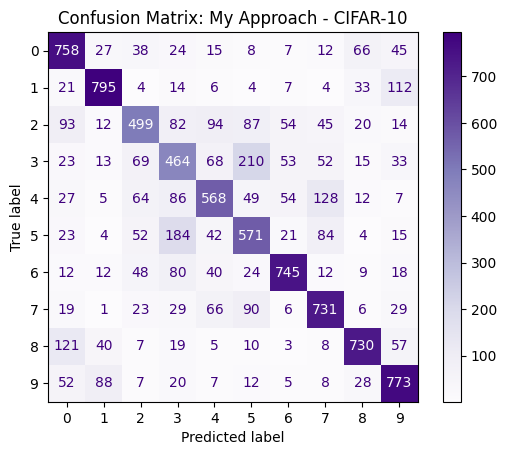

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# Predict on the test set
y_pred_probs = model_my_approach_cifar_10.predict(X_cifar_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_cifar_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: My Approach - CIFAR-10")
plt.grid(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


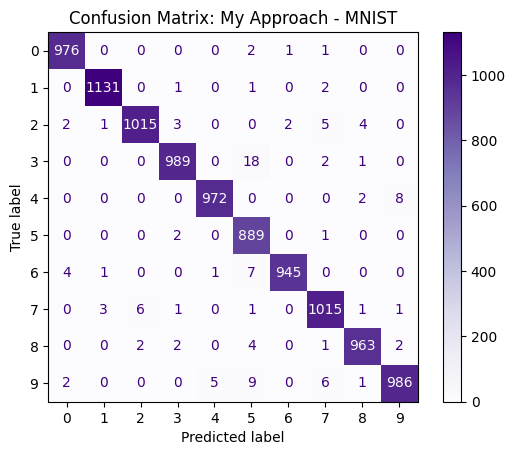

In [29]:
# Predict on the test set
y_pred_probs = model_my_approach_mnist.predict(X_mnist_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_mnist_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: My Approach - MNIST")
plt.grid(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


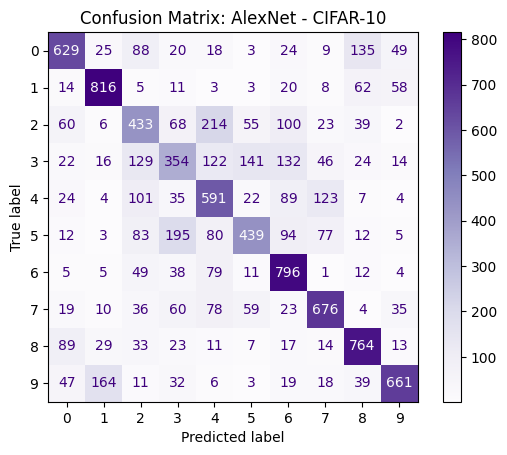

In [30]:
# Predict on the test set
y_pred_probs = model_alex_net_cifar_10.predict(X_cifar_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_cifar_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: AlexNet - CIFAR-10")
plt.grid(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step


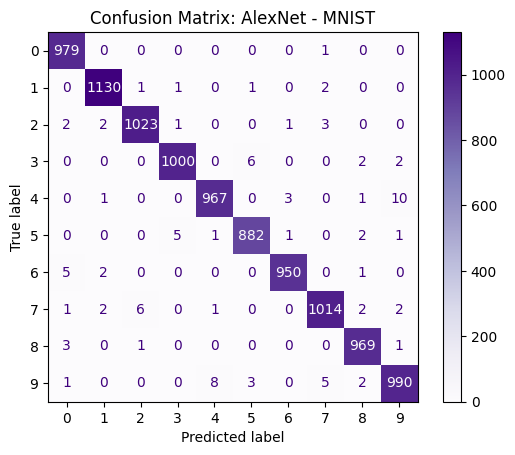

In [31]:
# Predict on the test set
y_pred_probs = model_alex_net_mnist.predict(X_mnist_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_mnist_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: AlexNet - MNIST")
plt.grid(False)
plt.show()

For MNIST, both of the confusion matrices look very good.

For CIFAR-10, we can definitely identify some weak classes.

### 4. Class Performance and Improvement

- Analyze per-class performance using the confusion matrix.
- Identify the classes with the **worst accuracy**.
- Apply **targeted data augmentation** (rotation, flipping, zooming, etc.) to improve performance for those classes.
- Retrain and report new performance metrics.

We can see that for my approach, the confusion matrix shows the worst results (worst accuracy) for classes 2,3 and 5, and for AlexNet classes 2,3,4 and 5. So we can apply data augmentation for the classes 2,3,4 and 5.

### Targeted data augmentation for 2, 3, 4 and 5

- **rotation_angle** : randomly rotate the image within +- x degrees. It helps the model become invariant to orientation. A value between 10-20 is the most common.
- **zoom_range** : randomly zoom in/out by x %, usualy x is between 1.1 and 0.3. It helps the model become invariant to the scale of the object.
- **width_shift_range, height_shift_range** - shift horizontally and vertically. This way, the model learns that an off-center object is still the same.
- **horizontal_flip** - the class don't depend on direction.
- **brightness_range** - used for colored images, like in CIFAR-10. Makes the model robust to lighting conditions. A value <1 means making the image darker and a values >1 means making the image brighter.

We should also flatten y_cifar_train_reduced.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

y_cifar_train_reduced = y_cifar_train_reduced.reshape(-1)

target_classes = [2, 3,4,5]
target_indices = np.isin(y_cifar_train_reduced, target_classes) # get the indices of the needed classes

X_target = X_cifar_train_final[target_indices]
y_target = y_cifar_train_reduced[target_indices]

# Augmentor with color-based transforms too
cifar_augmentor = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

aug_flow = cifar_augmentor.flow(X_target, y_target, batch_size=32)


cifar_augmentor.flow(X_target, y_target, batch_size=32) forms augmented images of our classes from the dataset and the next operations gets every time 32 new augmented images.

In [33]:
print(f'{X_cifar_train_final.shape} - size of X train')
print(f'{y_cifar_train_reduced.shape} - size of y train')

(17500, 32, 32, 3) - size of X train
(17500,) - size of y train


We have approx 1750 samples per class and we need augmentation for 4 classes in total, so we need N = 1750 * 4 = 7000 new samples.

In [34]:
# Generate ~7000 new examples
N = 7000
X_augmented = []
y_augmented = []

for _ in range(N // 32):
    x_batch, y_batch = next(aug_flow) # 32 new samples
    X_augmented.append(x_batch)
    y_augmented.append(y_batch)

#concatanate the batches
X_augmented = np.vstack(X_augmented) 
y_augmented = np.hstack(y_augmented)

# Combine with original CIFAR training set
X_cifar_augmented = np.concatenate((X_cifar_train_final, X_augmented)) 
y_cifar_augmented = np.concatenate((y_cifar_train_reduced, y_augmented))

Now let us retrain and see the accuracy.

## MY MODEL AUGMENTED

In [35]:
print(f'{X_cifar_augmented.shape} - size of X train')
print(f'{y_cifar_augmented.shape} - size of y train')

(24476, 32, 32, 3) - size of X train
(24476,) - size of y train


In [36]:

model_my_approach_cifar_10_augmented = Sequential([
    # First convolutional layer - extract data 
    Input(shape=(32,32,3)),
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

                    # Second convolutional layer - capture more intricate patterns
    Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Second convolutional layer - capture more intricate patterns
    Conv2D(128*2, kernel_size=(3,3), activation=LeakyReLU(negative_slope=0.01)),
    # Apply max-pooling to reduce input for next layer
    MaxPooling2D(pool_size=(2,2)),

    # Fully connected layer
    Flatten(),
    Dense(128, activation=LeakyReLU(negative_slope=0.01)), # simiar layer to previous simple NN laboratory
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_my_approach_cifar_10_augmented.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_my_approach_cifar_10_augmented.fit(X_cifar_augmented, y_cifar_augmented,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=9,
                    batch_size=32,
                    verbose=0)


In [39]:
print(f'{X_cifar_test_final.shape} - size of X test')
print(f'{y_cifar_test.shape} - size of y test')

(10000, 32, 32, 3) - size of X test
(10000, 1) - size of y test


Let us reshape y and then evaluate the accuracy.

In [40]:
y_cifar_test = y_cifar_test.reshape(-1)

In [41]:
test_loss, test_accuracy = model_my_approach_cifar_10_augmented.evaluate(X_cifar_test_final, y_cifar_test, verbose=0)
print(f"Test Accuracy model_my_approach_cifar_10: {test_accuracy:.4f}")

Test Accuracy model_my_approach_cifar_10: 0.6681


And the confustion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


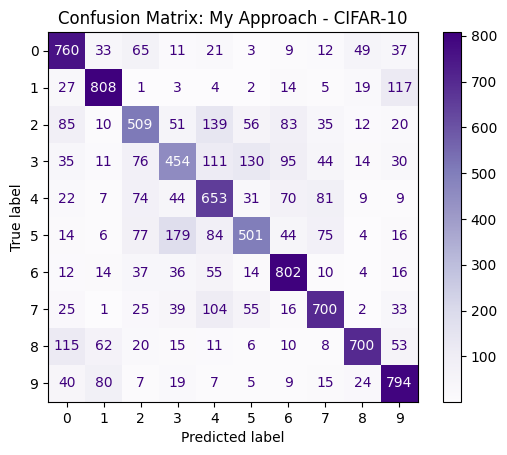

In [42]:
# Predict on the test set
y_pred_probs = model_my_approach_cifar_10_augmented.predict(X_cifar_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_cifar_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: My Approach - CIFAR-10")
plt.grid(False)
plt.show()

### ALEXNET AUGMENTED

In [43]:
model_alex_net_cifar_10_augmented = Sequential([
    Input(shape=(32, 32, 3)),  # CIFAR-10 RGB images

    Conv2D(96, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(384, (3, 3), padding='same',activation='relu'),

    Conv2D(256, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512,activation='relu'),  # Scaled down from 4096
    Dropout(0.5),

    Dense(512,activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

In [44]:
# Compile the model
model_alex_net_cifar_10_augmented.compile(optimizer='adam'
              , loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_alex_net_cifar_10_augmented.fit(X_cifar_augmented, y_cifar_augmented,
                    validation_split=0.2,    # use the parameters for the fitting
                    epochs=10,
                    batch_size=32,
                    verbose=0)


In [45]:
test_loss, test_accuracy = model_alex_net_cifar_10_augmented.evaluate(X_cifar_test_final, y_cifar_test, verbose=0)
print(f"Test Accuracy model_my_approach_cifar_10: {test_accuracy:.4f}")

Test Accuracy model_my_approach_cifar_10: 0.6378


313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step


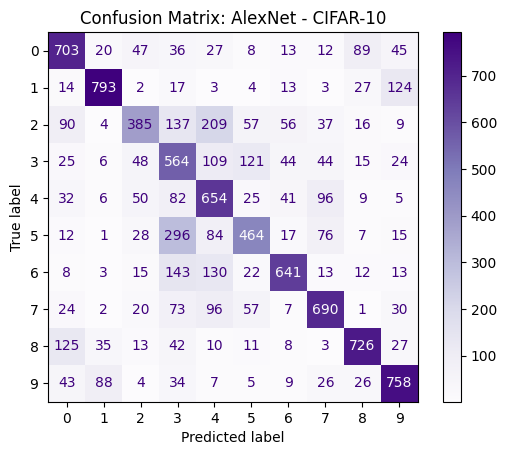

In [48]:
# Predict on the test set
y_pred_probs = model_alex_net_cifar_10_augmented.predict(X_cifar_test_final)  # Shape: (num_samples, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_cifar_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix: AlexNet - CIFAR-10")
plt.grid(False)
plt.show()

The accuracies have improved with about 3%, in the case of AlexNet and with about 1% in my model. This is because AlexNet is more complex and changes in the dataset are highly reflected in the model performance.

### 5. Deliverables

- Python scripts or Jupyter notebooks with full code.
- Plots (accuracy/loss curves, confusion matrices).
- Short report (markdown or pdf) summarizing:
   - Architecture details.
   - Hyperparameters analysis.
   - Performance comparison.
   - Augmentation strategy and its effect